In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import os, sys
import subprocess

import seaborn as sns

# Paths to data and figures
data_path = "/home/gayathri/MSc_thesis/Phase2/new/data_files"
fig_path = "/home/gayathri/MSc_thesis/Phase2/new/figures"




In [2]:
import os
import numpy as np
import re

def analyze_trials(trial1, trial2, data_path):
    """Analyze and compare two trials"""
    results = {}
    
    for trial_num in [trial1, trial2]:
        trial_path = os.path.join(data_path, f"trial_{trial_num}", "good_data.txt")
        
        if not os.path.exists(trial_path):
            raise FileNotFoundError(f"Trial {trial_num} data not found at {trial_path}")
        
        with open(trial_path, 'r') as f:
            content = f.read()
            
            # Extract B_strength values
            b_strength = []
            b_strength_section = re.search(r"# B_strength\[:, \d+\]([\s\S]+?)(?:---|\Z)", content)
            if b_strength_section:
                b_strength = [float(line) for line in b_strength_section.group(1).strip().split('\n') if line.strip()]
            
            # Initialize default stats
            stats = {
                'growth_slope': None,
                'decay_slope': None
            }
            
            # Try to extract summary statistics if they exist
            growth_match = re.search(r"Average growth slope:\s*([\d\.-]+)", content)
            decay_match = re.search(r"Average decay slope:\s*([\d\.-]+)", content)
            
            if growth_match:
                stats['growth_slope'] = float(growth_match.group(1))
            if decay_match:
                stats['decay_slope'] = float(decay_match.group(1))
            
            # Calculate metrics
            last_10_bstrength = b_strength[-10:] if len(b_strength) >= 10 else b_strength
            last_10_bmax = max(last_10_bstrength) if last_10_bstrength else 0
            
            results[trial_num] = {
                'b_strength': b_strength,
                'last_10_avg': np.mean(last_10_bstrength) if last_10_bstrength else 0,
                'last_10_max': last_10_bmax,
                'growth_slope': stats['growth_slope'],
                'decay_slope': stats['decay_slope'],
                'n_points': len(b_strength)
            }
    
    # Calculate comparisons (only for available metrics)
    comparisons = {}
    
    if all(results[trial1]['growth_slope'] is not None and results[trial2]['growth_slope'] is not None):
        comparisons['growth_slope_change'] = percent_change(results[trial1]['growth_slope'], results[trial2]['growth_slope'])
    
    if all(results[trial1]['decay_slope'] is not None and results[trial2]['decay_slope'] is not None):
        comparisons['decay_slope_change'] = percent_change(results[trial1]['decay_slope'], results[trial2]['decay_slope'])
    
    comparisons['bstrength_avg_change'] = percent_change(results[trial1]['last_10_avg'], results[trial2]['last_10_avg'])
    comparisons['bmax_change'] = percent_change(results[trial1]['last_10_max'], results[trial2]['last_10_max'])
    
    return {'trials': results, 'comparisons': comparisons}

def percent_change(old, new):
    """Calculate percentage change"""
    if old == 0:
        return float('inf') if new > 0 else float('-inf')
    return ((new - old) / abs(old)) * 100

def generate_report(analysis):
    """Generate formatted comparison report"""
    trial1, trial2 = analysis['trials'].keys()
    comp = analysis['comparisons']
    
    report = f"""
Trial Comparison Report: {trial1} vs {trial2}
{'='*50}

1. B-Strength Analysis:
   - Trial {trial1}: 
     • Last 10 avg: {analysis['trials'][trial1]['last_10_avg']:.4e}
     • Last 10 max: {analysis['trials'][trial1]['last_10_max']:.4e}
     • Data points: {analysis['trials'][trial1]['n_points']}
   
   - Trial {trial2}: 
     • Last 10 avg: {analysis['trials'][trial2]['last_10_avg']:.4e}
     • Last 10 max: {analysis['trials'][trial2]['last_10_max']:.4e}
     • Data points: {analysis['trials'][trial2]['n_points']}
   
   • B-Strength Avg Change: {comp['bstrength_avg_change']:+.2f}%
   • B-Max Change: {comp['bmax_change']:+.2f}%

2. Growth/Decay Analysis:
   - Trial {trial1}:
     • Growth slope: {analysis['trials'][trial1]['growth_slope'] if analysis['trials'][trial1]['growth_slope'] is not None else 'N/A'}
     • Decay slope: {analysis['trials'][trial1]['decay_slope'] if analysis['trials'][trial1]['decay_slope'] is not None else 'N/A'}
   
   - Trial {trial2}:
     • Growth slope: {analysis['trials'][trial2]['growth_slope'] if analysis['trials'][trial2]['growth_slope'] is not None else 'N/A'}
     • Decay slope: {analysis['trials'][trial2]['decay_slope'] if analysis['trials'][trial2]['decay_slope'] is not None else 'N/A'}
"""
    
    if 'growth_slope_change' in comp:
        report += f"   • Growth Rate Change: {comp['growth_slope_change']:+.2f}%\n"
    if 'decay_slope_change' in comp:
        report += f"   • Decay Rate Change: {comp['decay_slope_change']:+.2f}%\n"
    
    report += f"{'='*50}"
    return report

if __name__ == "__main__":
    data_path = input("Enter base data path: ").strip()
    trial1 = int(input("Enter first trial number: ").strip())
    trial2 = int(input("Enter second trial number: ").strip())
    
    try:
        analysis = analyze_trials(trial1, trial2, data_path)
        report = generate_report(analysis)
        print(report)
        
        # Save report
        save_path = os.path.join(data_path, f"comparison_{trial1}_vs_{trial2}.txt")
        with open(save_path, 'w') as f:
            f.write(report)
        print(f"\nReport saved to {save_path}")
    except Exception as e:
        print(f"\nError: {str(e)}")


ValueError: invalid literal for int() with base 10: ''

/tmp/ipykernel_10102/1062467002.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


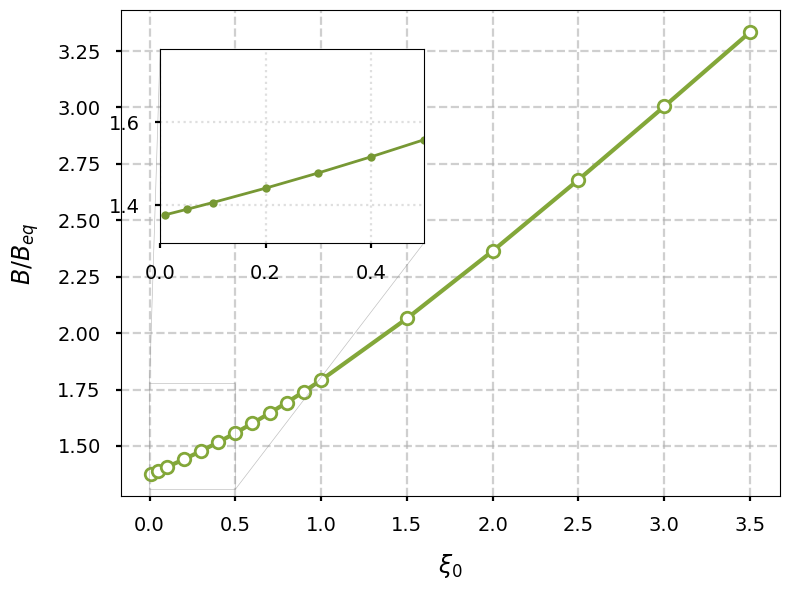

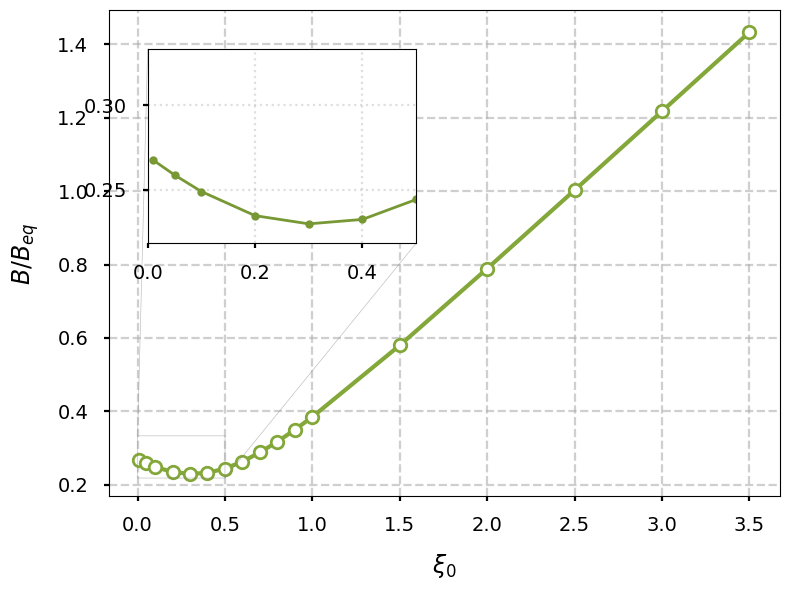

Plots created: max_field_high.png and max_field_low.png


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Dataset 1
data1 = [
    (0.01, 1.37665),
    (0.05, 1.389558),
    (0.1,  1.406134),
    (0.2,  1.440814),
    (0.3,  1.477594),
    (0.4,  1.516499),
    (0.5,  1.557511),
    (0.6,  1.600579),
    (0.7,  1.645628),
    (0.8,  1.692565),
    (0.9,  1.741288),
    (1.0,  1.791687),
    (1.5,  2.064921),
    (2.0,  2.364262),
    (2.5,  2.679685),
    (3.0,  3.004371),
    (3.5,  3.333917)
]

# Dataset 2
data2 = [
    (0.01, 0.2675598),
    (0.05, 0.2587113),
    (0.1,  0.2489217),
    (0.2,  0.2346186),
    (0.3,  0.2297755),
    (0.4,  0.2323968),
    (0.5,  0.2441916),
    (0.6,  0.2631585),
    (0.7,  0.2881834),
    (0.8,  0.3174712),
    (0.9,  0.3500397),
    (1.0,  0.3850289),
    (1.5,  0.5800984),
    (2.0,  0.7892761),
    (2.5,  1.002919),
    (3.0,  1.218058),
    (3.5,  1.433568)
]

def create_plot(data, title, ylabel, filename):
    xi, y = zip(*data)
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    # Main plot
    ax.plot(xi, y, 'o-', color='#83A739', linewidth=3, markersize=9, 
            markerfacecolor='white', markeredgewidth=2)
    ax.set_xlabel(r'$\xi_0$', fontsize=17)
    ax.set_ylabel(ylabel, fontsize=17,fontweight='bold')
    #increase fontsize of ticks
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.tick_params(axis='both', which='minor', labelsize=12)
    #an hline at 0.777
    # ax.axhline(y=0.777, color='r', linestyle='--', linewidth=1.5, label='Threshold')
    # ax.legend(loc='upper right', fontsize=12)
    # ax.set_title(title, fontsize=16, pad=20)
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Inset plot
    axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
    axins.plot(xi, y, 'o-', color='#779834', linewidth=2, markersize=6)
 
    

    
    
    # Set inset bounds - focusing on the interesting low-xi region
    axins.set_xlim(0, 0.5)
    axins.set_ylim(min(y[:10])*0.95, max(y[:10])*1.05)
    axins.grid(True, linestyle=':', alpha=0.4)
    
    # Add zoom indicators
    ax.indicate_inset_zoom(axins, edgecolor="gray", alpha=0.5)
    
    # # Add annotation for key features
    # if y[-1] > y[0]:  # Increasing trend
    #     ax.annotate(f'{ylabel} increases {y[-1]/y[0]:.1f}x',
    #                 xy=(xi[-1], y[-1]), xytext=(10, -20),
    #                 textcoords='offset points', ha='center',
    #                 arrowprops=dict(arrowstyle="->"))
    
    plt.tight_layout()
    plt.show()
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.close()

# Create both plots
create_plot(data1, 'Maximum Field Strength (High Range)', r'$B/B_{eq}$ ', 'max_field_high.png')
create_plot(data2, 'Maximum Field Strength (Low Range)', r'$B/B_{eq}$ ', 'max_field_low.png')

print("Plots created: max_field_high.png and max_field_low.png")


In [ ]:
import os
import numpy as np
import re
from glob import glob

def calculate_average_bstrength(trial_range, data_path):
    """
    Calculate average of last 10 B_strength values for given trial range
    
    Args:
        trial_range (str): Range in format 'start-end' (e.g., '20-25')
        data_path (str): Base path containing trial folders
    
    Returns:
        dict: Averages for each trial in the range with metadata
    """
    start, end = map(int, trial_range.split('-'))
    results = {
        'trials': {},
        'stats': {},
        'missing': []
    }
    
    for trial_num in range(start, end + 1):
        trial_path = os.path.join(data_path, f"trial_{trial_num}", "good_data.txt")
        
        if not os.path.exists(trial_path):
            results['missing'].append(trial_num)
            continue
            
        try:
            with open(trial_path, 'r') as f:
                lines = [line.strip() for line in f if line.strip()]
                
                # Find all B_strength data blocks
                blocks = []
                current_block = []
                for line in lines:
                    if line.startswith('# B_strength'):
                        if current_block:
                            blocks.append(current_block)
                        current_block = [line]
                    else:
                        current_block.append(line)
                if current_block:
                    blocks.append(current_block)
                
                if not blocks:
                    raise ValueError("No B_strength data found")
                
                # Process last block
                last_block = blocks[-1]
                values = []
                for line in last_block[1:]:  # Skip header
                    try:
                        values.append(float(line))
                    except ValueError:
                        continue
                
                last_10 = values[-10:] if len(values) >= 10 else values
                avg = np.mean(last_10)
                std = np.std(last_10)
                
                results['trials'][trial_num] = {
                    'average': avg,
                    'std_dev': std,
                    'n_values': len(last_10),
                    'min': min(last_10),
                    'max': max(last_10)
                }
                
        except Exception as e:
            print(f"Error processing trial {trial_num}: {str(e)}")
            results['missing'].append(trial_num)
    
    # Calculate overall statistics
    if results['trials']:
        all_avgs = [t['average'] for t in results['trials'].values()]
        results['stats'] = {
            'mean_avg': np.mean(all_avgs),
            'median_avg': np.median(all_avgs),
            'std_avg': np.std(all_avgs),
            'min_avg': min(all_avgs),
            'max_avg': max(all_avgs),
            'total_trials': len(results['trials'])
        }
    
    return results

def print_results(results):
    """Print formatted results"""
    if not results['trials']:
        print("No valid trials found!")
        return
    
    print("\nTrial Results:")
    print("-" * 60)
    print(f"{'Trial':<10}{'Average':<15}{'Std Dev':<15}{'Min':<15}{'Max':<15}")
    print("-" * 60)
    
    for trial, data in sorted(results['trials'].items()):
        print(f"{trial:<10}{data['average']:.4e}{data['std_dev']:.4e}{data['min']:.4e}{data['max']:.4e}")
    
    print("\nSummary Statistics:")
    print("-" * 60)
    stats = results['stats']
    print(f"Mean Average:    {stats['mean_avg']:.4e}")
    print(f"Median Average:  {stats['median_avg']:.4e}")
    print(f"Std Dev of Avgs: {stats['std_avg']:.4e}")
    print(f"Range:           {stats['min_avg']:.4e} - {stats['max_avg']:.4e}")
    print(f"Valid Trials:    {stats['total_trials']}/{stats['total_trials'] + len(results['missing'])}")
    
    if results['missing']:
        print(f"\nMissing Trials: {sorted(results['missing'])}")

if __name__ == "__main__":
    data_path = input("Enter base data path: ").strip()
    trial_range = input("Enter trial range (e.g., '20-25'): ").strip()
    
    results = calculate_average_bstrength(trial_range, data_path)
    print_results(results)
    
    # Option to save results
    save = input("\nSave results to file? (y/n): ").lower()
    if save == 'y':
        output_path = os.path.join(data_path, "bstrength_results.txt")
        with open(output_path, 'w') as f:
            f.write("Trial,Average,Std_Dev,Min,Max\n")
            for trial, data in sorted(results['trials'].items()):
                f.write(f"{trial},{data['average']:.6e},{data['std_dev']:.6e},"
                       f"{data['min']:.6e},{data['max']:.6e}\n")
        print(f"Results saved to {output_path}")



Trial Results:
------------------------------------------------------------
Trial     Average        Std Dev        Min            Max            
------------------------------------------------------------
600       7.7726e-010.0000e+007.7726e-017.7726e-01
601       1.6352e+002.2204e-161.6352e+001.6352e+00
602       3.3764e-011.4293e-053.3762e-013.3766e-01
603       7.0350e-011.1102e-167.0350e-017.0350e-01
604       8.9682e-024.2884e-068.9676e-028.9689e-02
605       1.6006e+000.0000e+001.6006e+001.6006e+00
606       2.4559e-013.8096e-052.4553e-012.4565e-01

Summary Statistics:
------------------------------------------------------------
Mean Average:    7.6992e-01
Median Average:  7.0350e-01
Std Dev of Avgs: 5.8159e-01
Range:           8.9682e-02 - 1.6352e+00
Valid Trials:    7/7
Results saved to /home/gayathri/MSc_thesis/Phase2/new/data_files/bstrength_results.txt


In [ ]:
import os
import numpy as np


# Read the data
data = np.loadtxt("/home/gayathri/MSc_thesis/Phase2/new/data_files/sat_stat.txt", skiprows=1)

# Extract columns
trial_numbers = data[:, 0].astype(int)
avg_b_strengths = data[:, 1]
selected_slopes = data[:, 2]

# Define parameter sets
v0 = [10, 20, 40, 60, 80]
romgea = [-10, -20, -40, -60, -80]
xi = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4]

# Build the trial mapping
trial_mapping = {}
for i in range(len(v0)):
    for j in range(len(romgea)):
        for k in range(len(xi)):
            trial_num = 1 + (i * len(romgea) * len(xi)) + (j * len(xi)) + k
            trial_mapping[trial_num] = (v0[i], romgea[j], xi[k])
output_stat_file = "summary.txt"

with open(output_stat_file, 'w') as f:
    f.write("Trial\tv0\tromega\txi\tAvg_B\tSelected_Slope\n")
    for trial_num, avg_b, slope in zip(trial_numbers, avg_b_strengths, selected_slopes):
        if trial_num in trial_mapping:
            v0_val, romgea_val, xi_val = trial_mapping[trial_num]
            f.write(f"{int(trial_num)}\t{v0_val}\t{romgea_val}\t{xi_val}\t{avg_b:.6e}\t{slope:.6e}\n")
            #save the trial number, v0, romgea, xi, avg_b, and selected slope to the file
        else:
            print(f"Trial number {trial_num} not found in mapping.")
# Read the summary file
summary_data = np.loadtxt(output_stat_file, skiprows=1)
# Extract columns
trial_numbers = summary_data[:, 0].astype(int)
v0_values = summary_data[:, 1]
romgea_values = summary_data[:, 2]
xi_values = summary_data[:, 3]
avg_b_values = summary_data[:, 4]
selected_slopes = summary_data[:, 5]


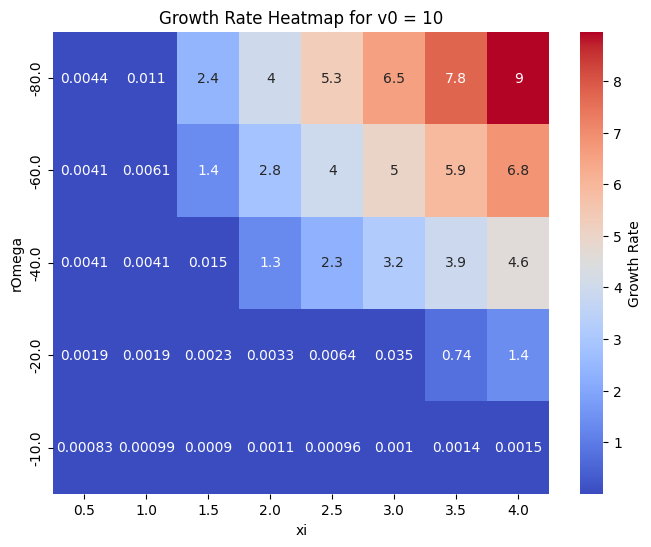

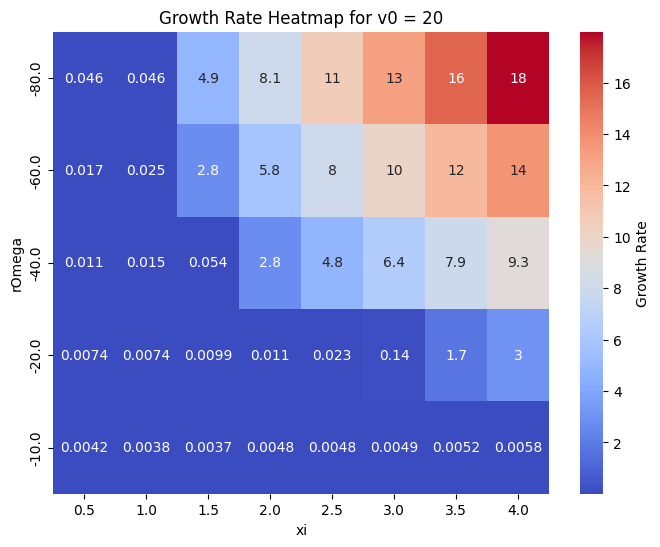

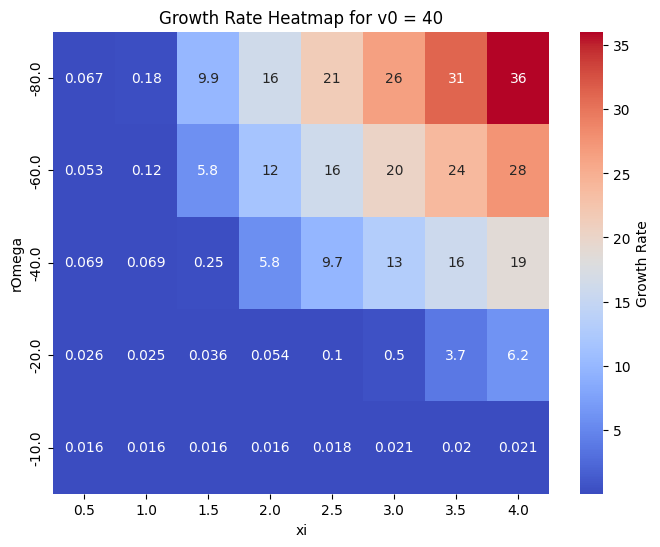

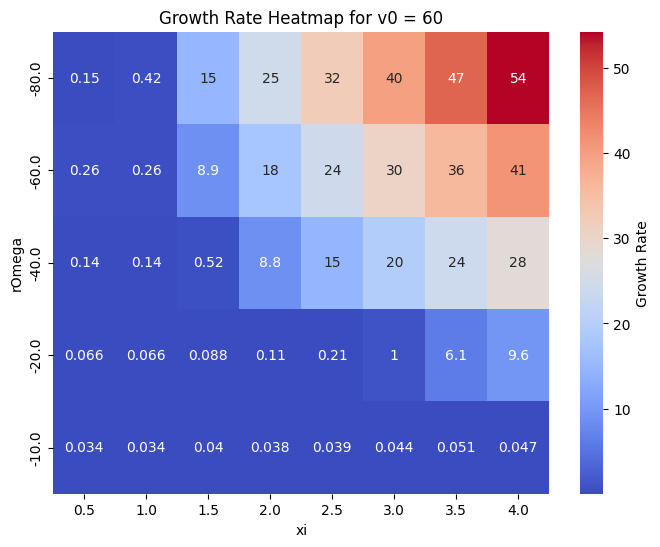

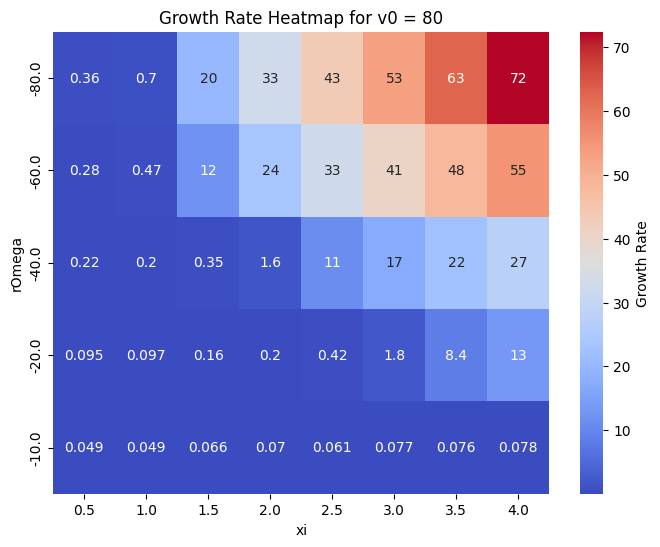

In [ ]:
v0_set = [10, 20, 40, 60, 80]

# Loop through each v0 value and plot heatmap
for v0 in v0_set:
    # Select data corresponding to the current v0
    selected_data = summary_data[v0_values == v0]
    
    # Extract rOmega, xi, and growth rate (avg_b_values)
    romgea = selected_data[:, 2]
    xi = selected_data[:, 3]
    growth_rate = selected_data[:, 4]

    # Create a 2D grid for rOmega and xi
    rOmega_unique = np.unique(romgea)
    xi_unique = np.unique(xi)

    # Initialize a 2D array to store growth rates
    growth_rate_grid = np.zeros((len(rOmega_unique), len(xi_unique)))

    # Fill the grid with corresponding growth rates
    for i, r in enumerate(rOmega_unique):
        for j, x in enumerate(xi_unique):
            growth_rate_grid[i, j] = np.mean(growth_rate[(romgea == r) & (xi == x)])

    # Create a mask for zero values
    mask = growth_rate_grid == 0

    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(growth_rate_grid, annot=True, mask=mask, xticklabels=xi_unique, yticklabels=rOmega_unique, cmap='coolwarm', cbar_kws={'label': 'Growth Rate'})
    plt.title(f'Growth Rate Heatmap for v0 = {v0}')
    plt.xlabel('xi')
    plt.ylabel('rOmega')
    plt.show()


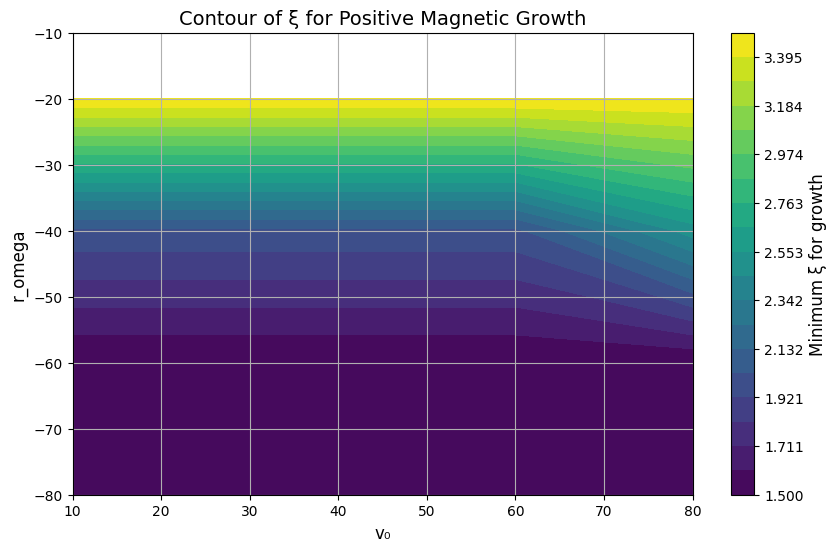

In [ ]:
from collections import defaultdict

min_xi_for_growth = defaultdict(lambda: None)

for trial_num, v0_val, romega_val, xi_val, avg_b, slope in zip(trial_numbers, v0_values, romgea_values, xi_values, avg_b_values, selected_slopes):
    if slope > 0:
        key = (v0_val, romega_val)
        if (min_xi_for_growth[key] is None) or (xi_val < min_xi_for_growth[key]):
            min_xi_for_growth[key] = xi_val

with open("min_xi_growth.txt", 'w') as f:
    f.write("v0\tromega\tmin_xi_for_growth\n")
    for (v0_val, romega_val), xi_val in sorted(min_xi_for_growth.items()):
        f.write(f"{int(v0_val)}\t{int(romega_val)}\t{xi_val}\n")
min_xi_growth = defaultdict(lambda: None)

for v0, romgea, xi, slope in zip(v0_values, romgea_values, xi_values, selected_slopes):
    if slope > 0:
        key = (v0, romgea)
        if (min_xi_growth[key] is None) or (xi < min_xi_growth[key]):
            min_xi_growth[key] = xi
# Get sorted unique v0 and romgea values
v0_list = sorted(list(set(v0_values)))
romgea_list = sorted(list(set(romgea_values)))

# Create meshgrid
V0, ROMEGA = np.meshgrid(v0_list, romgea_list)
Z = np.full(V0.shape, np.nan)  # Start with NaNs

# Fill in min ξ values
for i, rom in enumerate(romgea_list):
    for j, v0 in enumerate(v0_list):
        xi_val = min_xi_growth.get((v0, rom))
        if xi_val is not None:
            Z[i, j] = xi_val
plt.figure(figsize=(10, 6))
cp = plt.contourf(V0, ROMEGA, Z, levels=np.linspace(np.nanmin(Z), np.nanmax(Z), 20), cmap='viridis')
cbar = plt.colorbar(cp)
cbar.set_label('Minimum ξ for growth', fontsize=12)
plt.xlabel('v₀', fontsize=12)
plt.ylabel('r_omega', fontsize=12)
plt.title('Contour of ξ for Positive Magnetic Growth', fontsize=14)
plt.grid(True)
plt.savefig(os.path.join(fig_path, "contour_min_xi_growth.png"))
plt.show()


In [ ]:
#print vo values in summary file
with open(output_stat_file, 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        parts = line.strip().split('\t')
        trial_num = int(parts[0])
        v0_val = float(parts[1])
        romgea_val = float(parts[2])
        xi_val = float(parts[3])
        avg_b_val = float(parts[4])
        selected_slope_val = float(parts[5])
        # print(f"Trial {trial_num}: v0={v0_val}, romgea={romgea_val}, xi={xi_val}, Avg_B={avg_b_val:.6e}, Selected Slope={selected_slope_val:.6e}")


In [ ]:
v0_unique = np.unique(v0_values)
romgea_unique = np.unique(romgea_values)

# Initialize grid with NaNs (so missing values show clearly)
growth_rate_grid = np.full((len(romgea_unique), len(v0_unique)), np.nan)

# Fill grid
for v0, ro, slope in zip(v0_values, romgea_values, selected_slopes):
    i = np.where(romgea_unique == ro)[0][0]
    j = np.where(v0_unique == v0)[0][0]
    growth_rate_grid[i, j] = slope


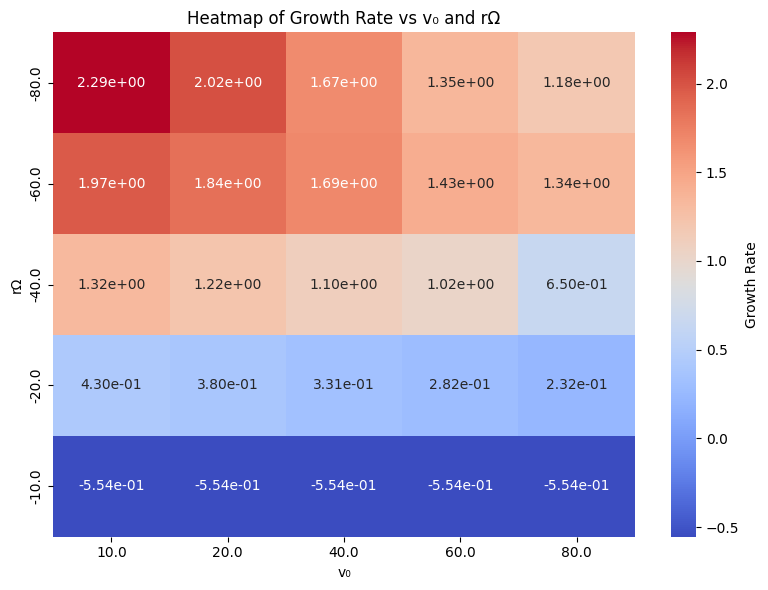

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    growth_rate_grid,
    annot=True,
    xticklabels=v0_unique,
    yticklabels=romgea_unique,
    cmap="coolwarm",  # or "viridis", "plasma", etc.
    fmt=".2e",
    cbar_kws={'label': 'Growth Rate'}
)
plt.xlabel('v₀')
plt.ylabel('rΩ')
plt.title('Heatmap of Growth Rate vs v₀ and rΩ')
plt.tight_layout()
plt.savefig("growth_rate_heatmap.png")
plt.show()


#now make it 3d, add xi as the third axis
from mpl_toolkits.mplot3d import Axes3D



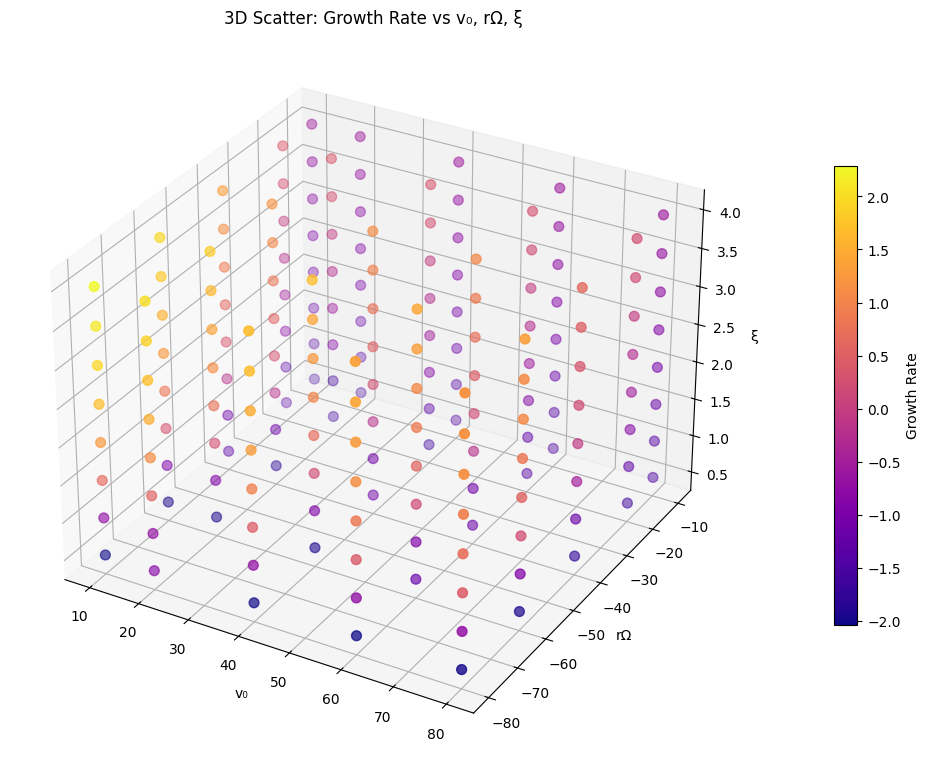

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points
p = ax.scatter(v0_values, romgea_values, xi_values, c=selected_slopes,
               cmap='plasma', marker='o', s=50)

# Axis labels
ax.set_xlabel('v₀')
ax.set_ylabel('rΩ')
ax.set_zlabel('ξ')
ax.set_title('3D Scatter: Growth Rate vs v₀, rΩ, ξ')

# Color bar for growth rates
cbar = fig.colorbar(p, ax=ax, shrink=0.6, pad=0.1)
cbar.set_label('Growth Rate')

plt.tight_layout()
plt.savefig("3d_growth_scatter.png")
plt.show()


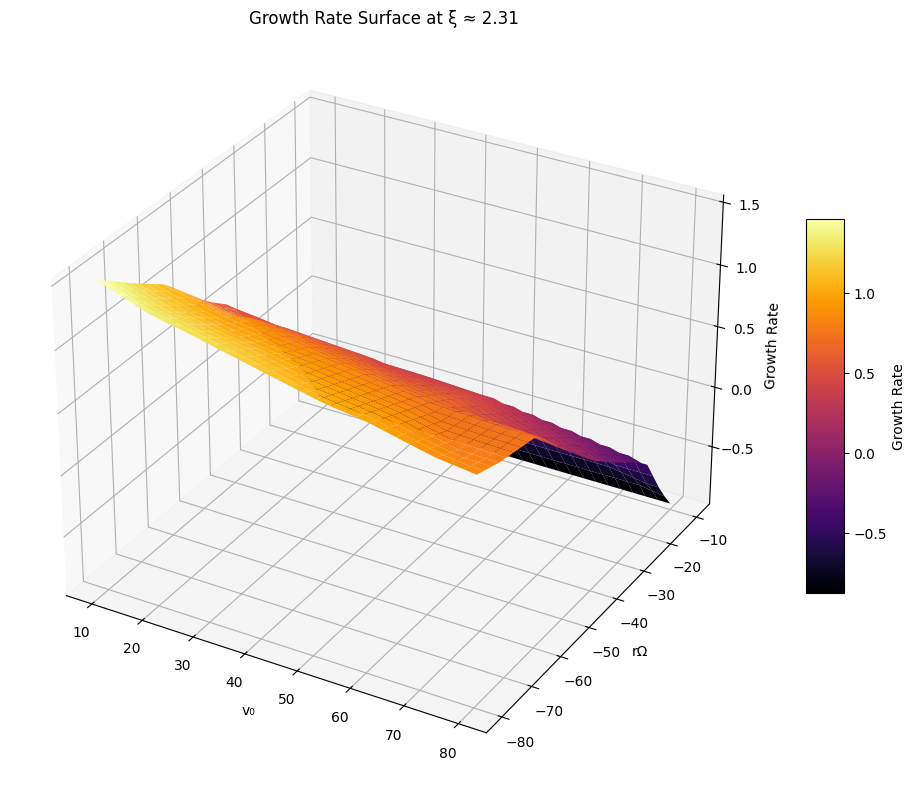

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
import numpy as np
import matplotlib.pyplot as plt

# Define grid
v0_lin = np.linspace(min(v0_values), max(v0_values), 30)
ro_lin = np.linspace(min(romgea_values), max(romgea_values), 30)
xi_lin = np.linspace(min(xi_values), max(xi_values), 30)

V0, RO, XI = np.meshgrid(v0_lin, ro_lin, xi_lin)

# Interpolate growth rates onto the grid
growth_interp = griddata(
    points=(v0_values, romgea_values, xi_values),
    values=selected_slopes,
    xi=(V0, RO, XI),
    method='linear'
)

# Pick a slice (e.g. fixed ξ) to visualize
slice_index = 15  # just one ξ slice
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(V0[:, :, slice_index], RO[:, :, slice_index], growth_interp[:, :, slice_index],
                       cmap=cm.inferno, edgecolor='none')

ax.set_xlabel('v₀')
ax.set_ylabel('rΩ')
ax.set_zlabel('Growth Rate')
ax.set_title(f"Growth Rate Surface at ξ ≈ {xi_lin[slice_index]:.2f}")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Growth Rate')
plt.tight_layout()
plt.savefig("3d_growth_surface_slice.png")
plt.show()


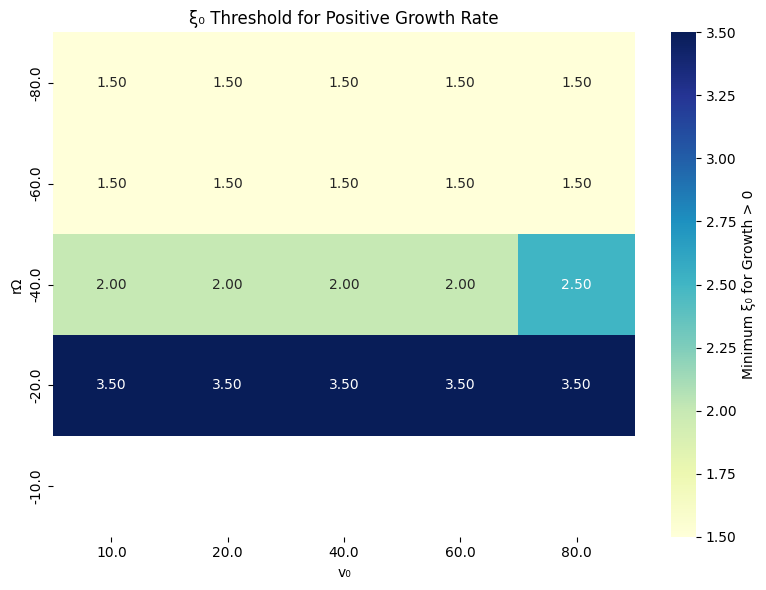

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

v0_unique = np.unique(v0_values)
romgea_unique = np.unique(romgea_values)

# Initialize with NaNs
min_xi_grid = np.full((len(romgea_unique), len(v0_unique)), np.nan)

# Loop through each (v₀, rΩ) combo
for i, ro in enumerate(romgea_unique):
    for j, v0 in enumerate(v0_unique):
        # Get all ξ and slopes for this combo
        mask = (romgea_values == ro) & (v0_values == v0)
        xi_subset = xi_values[mask]
        slope_subset = selected_slopes[mask]

        # Filter where slope > 0
        positive_growth_xi = xi_subset[slope_subset > 0]

        if positive_growth_xi.size > 0:
            min_xi_grid[i, j] = np.min(positive_growth_xi)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(
    min_xi_grid,
    annot=True,
    xticklabels=v0_unique,
    yticklabels=romgea_unique,
    cmap="YlGnBu",  # or "magma", "viridis", etc.
    fmt=".2f",
    cbar_kws={'label': 'Minimum ξ₀ for Growth > 0'}
)
plt.xlabel('v₀')
plt.ylabel('rΩ')
plt.title('ξ₀ Threshold for Positive Growth Rate')
plt.tight_layout()
plt.savefig("xi0_growth_threshold.png")
plt.show()


In [ ]:
#plot a heatmap of v=10, 20, 40, 60, 80 seperately. r omega on one axis, xi on other. colour is growth rate



Text(0.5, 1.0, 'Correlation between Avg_B and Slope')

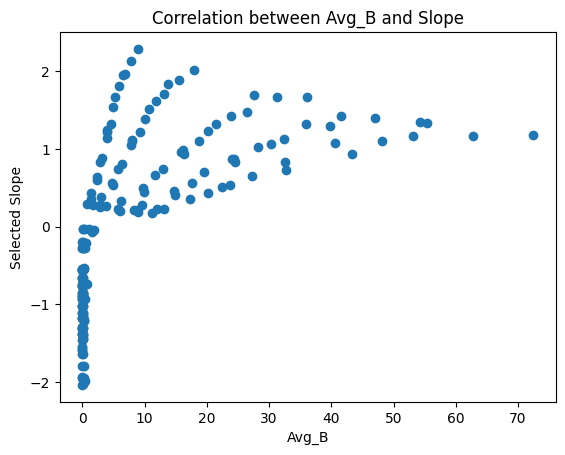

In [ ]:
plt.scatter(avg_b_values, selected_slopes)
plt.xlabel("Avg_B")
plt.ylabel("Selected Slope")
plt.title("Correlation between Avg_B and Slope")


In [ ]:
data = np.loadtxt("/home/gayathri/MSc_thesis/Phase2/new/data_files/plotSheet2.tsv",skiprows=1, delimiter='\t')


In [ ]:
# print(data)
# Extract columns
trial_numbers = data[:, 3].astype(int)
v0_values = data[:, 0]
romgea_values = data[:, 1]
xi_values = data[:, 2]
avg_b_values = data[:, 4]
selected_slopes = data[:, 5]

# print(avg_b_values)


In [ ]:
#plot xi vs growthrate for vo=10 when romega=-20

def plot_growth_rate_vs_xi(v0_val, romega_val):
    # Filter data for the given v0 and romega
    filtered_data = data[(data[:, 0] == v0_val) & (data[:, 1] == romega_val)]

    if filtered_data.size == 0:
        print(f"No data found for v0={v0_val} and romega={romega_val}.")
        return

    xi_values = filtered_data[:, 2]
    growth_rates = filtered_data[:, 5]

    plt.figure(figsize=(8, 6))
    plt.plot(xi_values, growth_rates, marker='o', linestyle='-', color='b')
    plt.xlabel('xi')
    plt.ylabel('Growth Rate')
    plt.title(f'Growth Rate vs xi for v0={v0_val} and romega={romega_val}')
    plt.grid()
    plt.show()
# # Example usage
# plot_growth_rate_vs_xi(10, -20)
# #plot xi vs growthrate for vo=20 when romega=-20
# plot_growth_rate_vs_xi(20, -20)
# #plot xi vs growthrate for vo=40 when romega=-20
# plot_growth_rate_vs_xi(40, -20)
# #plot xi vs growthrate for vo=60 when romega=-20
# plot_growth_rate_vs_xi(60, -20)
# #plot xi vs growthrate for vo=80 when romega=-20
# plot_growth_rate_vs_xi(80, -20)
# #plot xi vs growthrate for vo=10 when romega=-40




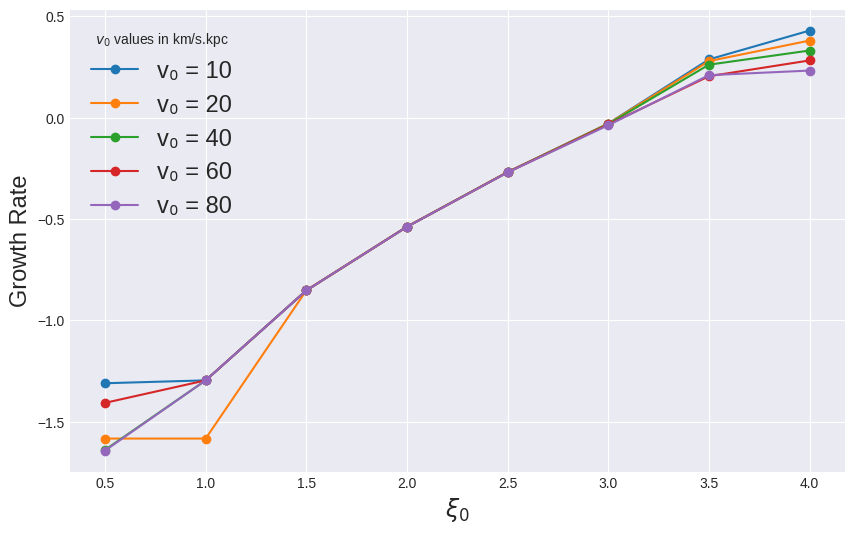

In [ ]:
def plot_growth_vs_xi_for_fixed_romega(romega_val):
    # Filter data for the given romega
    filtered_data = data[data[:, 1] == romega_val]

    if filtered_data.size == 0:
        print(f"No data found for romega = {romega_val}.")
        return

    plt.figure(figsize=(10, 6))
    unique_v0s = np.unique(filtered_data[:, 0])

    for v0 in unique_v0s:
        subset = filtered_data[filtered_data[:, 0] == v0]
        xi = subset[:, 2]
        growth = subset[:, 5]

        # Sort by xi for pretty plots
        sort_idx = np.argsort(xi)
        xi = xi[sort_idx]
        growth = growth[sort_idx]

        plt.plot(xi, growth, marker='o', linestyle='-', label=f'v₀ = {v0:.0f}')

    plt.xlabel(r'$\xi_0$', fontsize=17)
    plt.ylabel('Growth Rate', fontsize=17)
    # plt.title(f'Growth Rate vs ξ for various v₀ (romega = {romega_val})')
    plt.legend(title=r'$v_0$ values in km/s.kpc',fontsize=17)
    plt.grid(True)
    # plt.tight_layout()
    plt.show()

# Example usage
plot_growth_vs_xi_for_fixed_romega(-20)


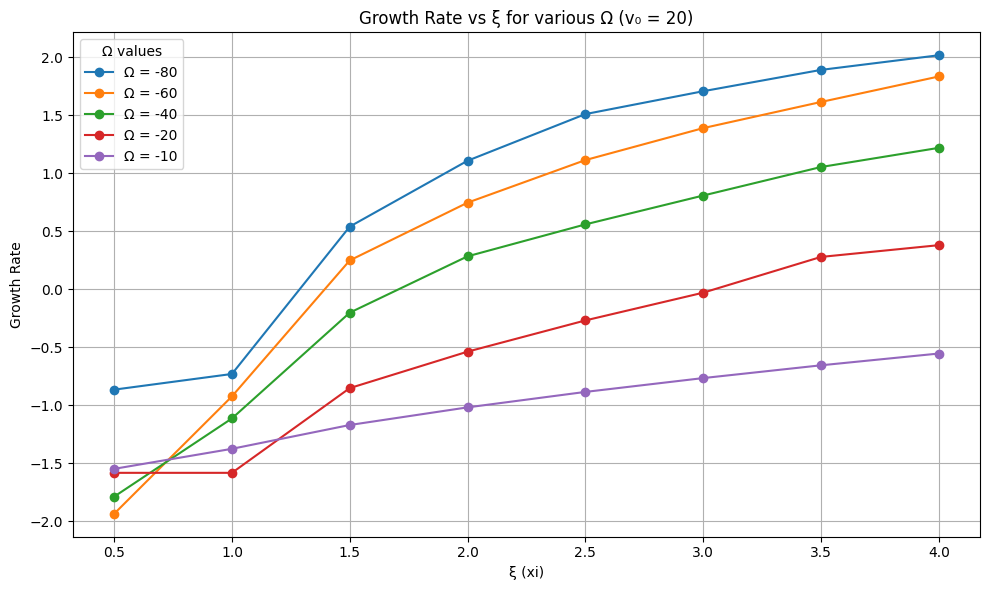

In [ ]:
def plot_growth_vs_xi_for_fixed_v0(v0_val):
    # Filter data for the given v0
    filtered_data = data[data[:, 0] == v0_val]

    if filtered_data.size == 0:
        print(f"No data found for v₀ = {v0_val}.")
        return

    plt.figure(figsize=(10, 6))
    unique_romegas = np.unique(filtered_data[:, 1])

    for romega in unique_romegas:
        subset = filtered_data[filtered_data[:, 1] == romega]
        xi = subset[:, 2]
        growth = subset[:, 5]

        # Sort by xi for visual clarity
        sort_idx = np.argsort(xi)
        xi = xi[sort_idx]
        growth = growth[sort_idx]

        plt.plot(xi, growth, marker='o', linestyle='-', label=f'Ω = {romega:.0f}')

    plt.xlabel('ξ (xi)')
    plt.ylabel('Growth Rate')
    plt.title(f'Growth Rate vs ξ for various Ω (v₀ = {v0_val})')
    plt.legend(title='Ω values')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_growth_vs_xi_for_fixed_v0(20)


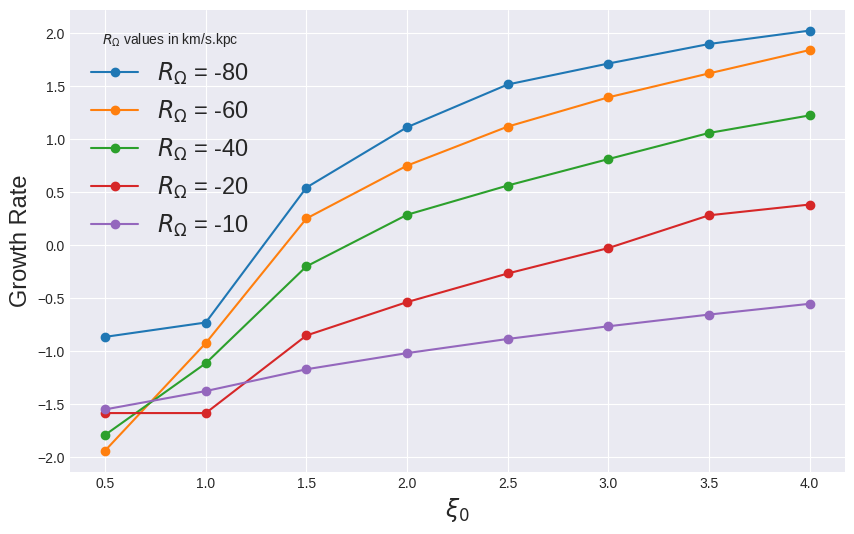

In [ ]:
def plot_growth_vs_xi_for_fixed_v0(v0_val):
    # Filter data for the given v0
    filtered_data = data[data[:, 0] == v0_val]

    if filtered_data.size == 0:
        print(f"No data found for v₀ = {v0_val}.")
        return

    plt.figure(figsize=(10, 6))
    unique_romegas = np.unique(filtered_data[:, 1])

    for romega in unique_romegas:
        subset = filtered_data[filtered_data[:, 1] == romega]
        xi = subset[:, 2]
        growth = subset[:, 5]

        # Sort by xi for visual clarity
        sort_idx = np.argsort(xi)
        xi = xi[sort_idx]
        growth = growth[sort_idx]

        plt.plot(xi, growth, marker='o', linestyle='-', label=rf'$R_\Omega$ = {romega:.0f}')

    plt.xlabel(r'$\xi_0$', fontsize=17)
    plt.ylabel('Growth Rate', fontsize=17)
    # plt.title(f'Growth Rate vs ξ for various Ω (v₀ = {v0_val})')
    plt.legend(title=r'$R_\Omega$ values in km/s.kpc', fontsize=17)
    plt.grid(True)
    # plt.tight_layout()
    plt.show()

# Example usage
plot_growth_vs_xi_for_fixed_v0(20)


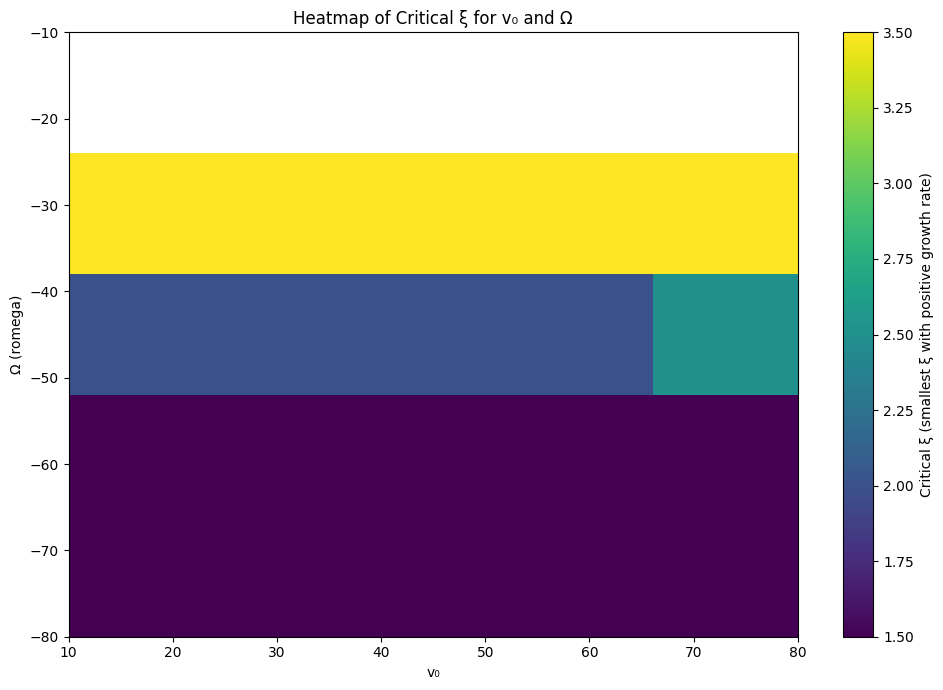

In [ ]:
import matplotlib.pyplot as plt

# Create a grid to hold ξₜ values
v0_vals = np.unique(data[:, 0])
romega_vals = np.unique(data[:, 1])

xi_grid = np.full((len(romega_vals), len(v0_vals)), np.nan)  # rows: romega, cols: v0

for i, romega in enumerate(romega_vals):
    for j, v0 in enumerate(v0_vals):
        subset = data[(data[:, 0] == v0) & (data[:, 1] == romega)]
        if subset.size == 0:
            continue
        xi_vals = subset[:, 2]
        growth_rates = subset[:, 5]
        sorted_indices = np.argsort(xi_vals)
        xi_vals = xi_vals[sorted_indices]
        growth_rates = growth_rates[sorted_indices]
        pos_idx = np.where(growth_rates > 0)[0]
        if pos_idx.size > 0:
            xi_grid[i, j] = xi_vals[pos_idx[0]]

# Plot heatmap
plt.figure(figsize=(10, 7))
im = plt.imshow(xi_grid, origin='lower', aspect='auto',
                extent=[v0_vals[0], v0_vals[-1], romega_vals[0], romega_vals[-1]],
                cmap='viridis', interpolation='none')
plt.colorbar(im, label='Critical ξ (smallest ξ with positive growth rate)')
plt.xlabel('v₀')
plt.ylabel('Ω (romega)')
plt.title('Heatmap of Critical ξ for v₀ and Ω')
plt.grid(False)
plt.tight_layout()
plt.show()


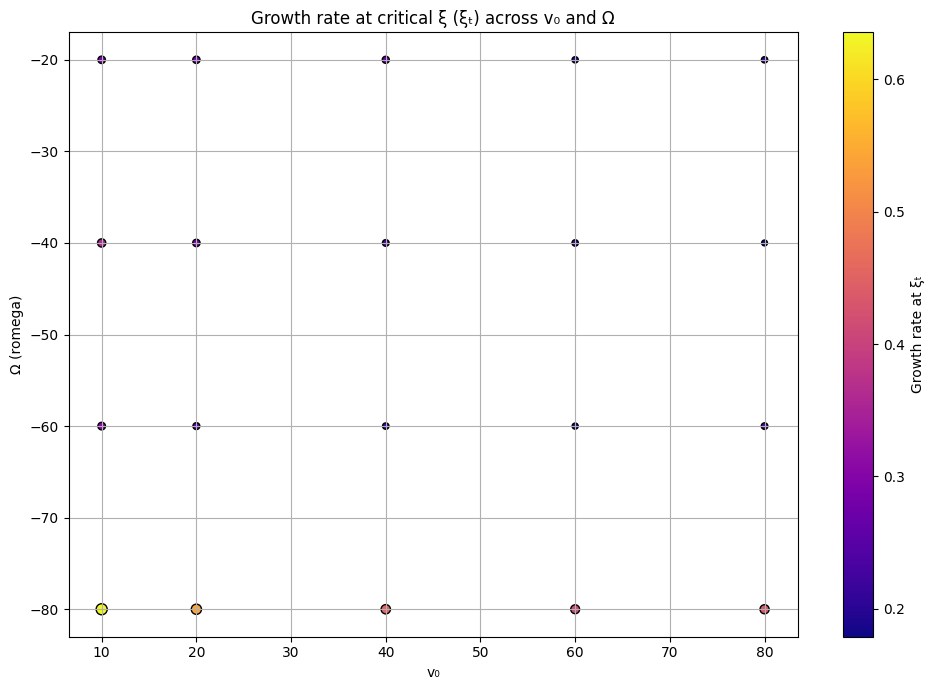

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique parameter values
v0_vals = np.unique(data[:, 0])
romega_vals = np.unique(data[:, 1])

# Lists to store results
v0_list = []
romega_list = []
xi_crit_list = []
growth_rate_at_xi_crit = []

for v0 in v0_vals:
    for romega in romega_vals:
        subset = data[(data[:, 0] == v0) & (data[:, 1] == romega)]
        if subset.size == 0:
            continue

        xi_vals = subset[:, 2]
        growth_rates = subset[:, 5]
        sorted_indices = np.argsort(xi_vals)
        xi_vals = xi_vals[sorted_indices]
        growth_rates = growth_rates[sorted_indices]

        pos_idx = np.where(growth_rates > 0)[0]
        if pos_idx.size > 0:
            xi_crit = xi_vals[pos_idx[0]]
            growth_at_xi_crit = growth_rates[pos_idx[0]]
            v0_list.append(v0)
            romega_list.append(romega)
            xi_crit_list.append(xi_crit)
            growth_rate_at_xi_crit.append(growth_at_xi_crit)

# Convert to arrays
v0_arr = np.array(v0_list)
romega_arr = np.array(romega_list)
xi_crit_arr = np.array(xi_crit_list)
growth_arr = np.array(growth_rate_at_xi_crit)

# Plot
plt.figure(figsize=(10, 7))
sc = plt.scatter(v0_arr, romega_arr, c=growth_arr, s=100 * growth_arr, cmap='plasma', edgecolors='k')
cbar = plt.colorbar(sc)
cbar.set_label('Growth rate at ξₜ')

plt.xlabel('v₀')
plt.ylabel('Ω (romega)')
plt.title('Growth rate at critical ξ (ξₜ) across v₀ and Ω')
plt.grid(True)
plt.tight_layout()
plt.show()


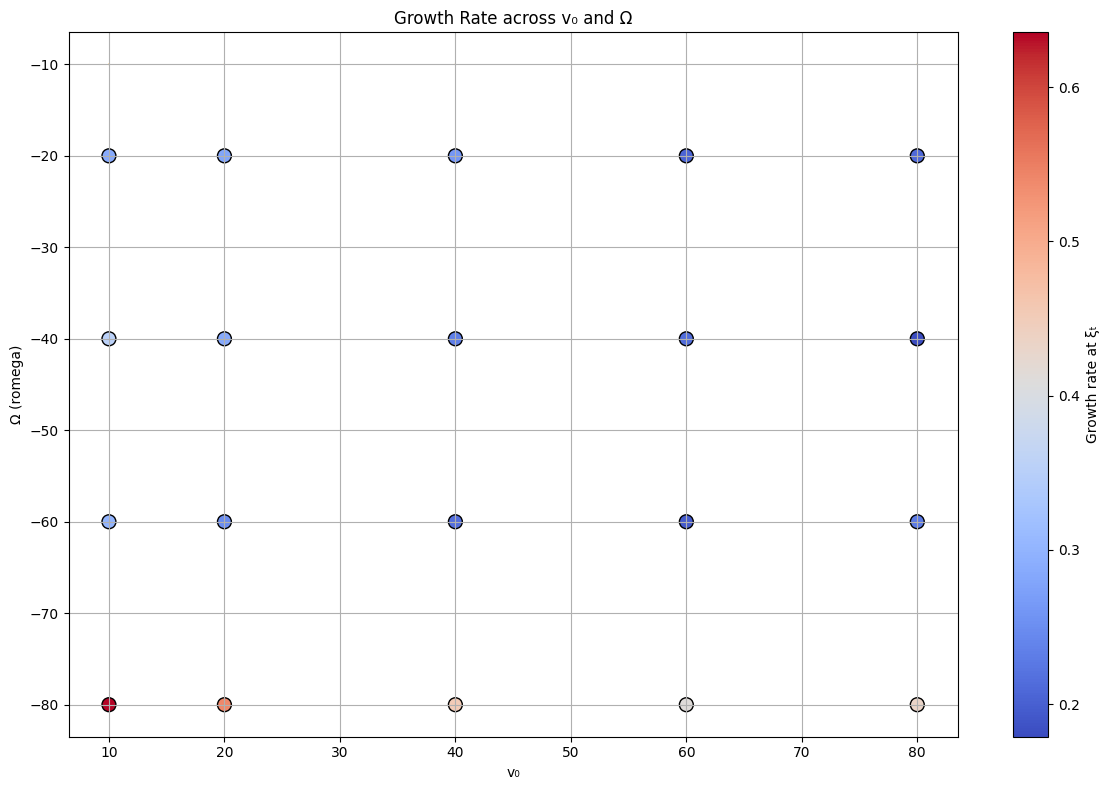

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Unique parameter values
v0_vals = np.unique(data[:, 0])
romega_vals = np.unique(data[:, 1])

# Lists to store results
v0_list = []
romega_list = []
xi_crit_list = []
growth_rate_at_xi_crit = []

# Get the meshgrid for quiver
v0_grid, romega_grid = np.meshgrid(v0_vals, romega_vals)

# Initialize arrays for the arrow components (vx, vy)
vx = np.zeros_like(v0_grid)
vy = np.zeros_like(romega_grid)
growth_at_points = np.zeros_like(v0_grid)

# We need to keep track of the previous values for comparison in the loop
previous_growth_rate = {}

for i, v0 in enumerate(v0_vals):
    for j, romega in enumerate(romega_vals):
        subset = data[(data[:, 0] == v0) & (data[:, 1] == romega)]
        if subset.size == 0:
            continue

        xi_vals = subset[:, 2]
        growth_rates = subset[:, 5]
        sorted_indices = np.argsort(xi_vals)
        xi_vals = xi_vals[sorted_indices]
        growth_rates = growth_rates[sorted_indices]

        pos_idx = np.where(growth_rates > 0)[0]
        if pos_idx.size > 0:
            xi_crit = xi_vals[pos_idx[0]]
            growth_at_xi_crit_val = growth_rates[pos_idx[0]]

            v0_list.append(v0)
            romega_list.append(romega)
            xi_crit_list.append(xi_crit)
            growth_rate_at_xi_crit.append(growth_at_xi_crit_val)

            # For arrow directions: Calculate differences with previous point
            if (v0, romega) in previous_growth_rate:
                prev_growth_rate = previous_growth_rate[(v0, romega)]
                # Calculate growth rate difference for arrow direction
                vx[i, j] = growth_at_xi_crit_val - prev_growth_rate
                vy[i, j] = growth_at_xi_crit_val - prev_growth_rate

            # Update the previous growth rate for this (v0, romega) pair
            previous_growth_rate[(v0, romega)] = growth_at_xi_crit_val

# Create the quiver plot
plt.figure(figsize=(12, 8))

# Show arrows representing direction of growth change
plt.quiver(v0_grid, romega_grid, vx, vy, angles='xy', scale_units='xy', scale=0.5, color='orange', width=0.002)

# Add scatter plot of the critical points
sc = plt.scatter(v0_list, romega_list, c=growth_rate_at_xi_crit, s=100, cmap='coolwarm', edgecolors='k')

# Add a colorbar to indicate growth rates
cbar = plt.colorbar(sc)
cbar.set_label('Growth rate at ξₜ')

# Labels and title
plt.xlabel('v₀')
plt.ylabel('Ω (romega)')
plt.title('Growth Rate across v₀ and Ω')
plt.grid(True)
plt.tight_layout()
plt.show()


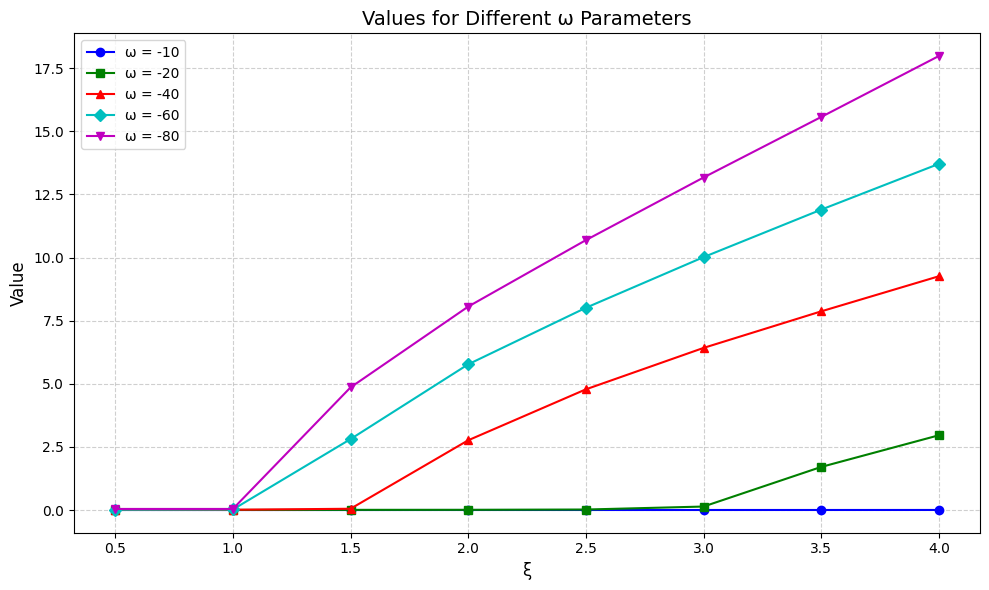

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
xi = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
omega_values = [-10, -20, -40, -60, -80]

# Each row corresponds to a different omega value
data = np.array([
    [0.00421972, 0.003802029, 0.00370134, 0.004784124, 0.004796744, 0.004904322, 0.005158537, 0.005809566],    # ω = -10
    [0.007373378, 0.007373378, 0.009872619, 0.0112461, 0.02284079, 0.1412522, 1.70906, 2.962589],             # ω = -20
    [0.01123519, 0.01467319, 0.05379774, 2.764936, 4.781789, 6.421765, 7.869406, 9.258857],                    # ω = -40
    [0.01664357, 0.02465521, 2.81156, 5.772426, 8.010338, 10.01556, 11.89655, 13.70899],                       # ω = -60
    [0.04638288, 0.04638288, 4.85812, 8.058116, 10.68913, 13.16918, 15.56549, 17.97894]                        # ω = -80
])

# Create plot
plt.figure(figsize=(10, 6))

# Plot each omega series
markers = ['o', 's', '^', 'D', 'v']  # Different markers for each series
colors = ['b', 'g', 'r', 'c', 'm']    # Different colors for each series

for i, omega in enumerate(omega_values):
    plt.plot(xi, data[i], marker=markers[i], color=colors[i],linestyle='-', linewidth=1.5,markersize=6,label=f'ω = {omega}')

# Customize plot
plt.xlabel('ξ', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.yscale('log')  # Log scale for y-axis
plt.title('Values for Different ω Parameters', fontsize=14)
plt.legend(fontsize=17)
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust y-axis scale if needed (some values are very large compared to others)
plt.yscale('linear')  # You might want to try 'log' if the range is too wide

plt.tight_layout()
plt.show()


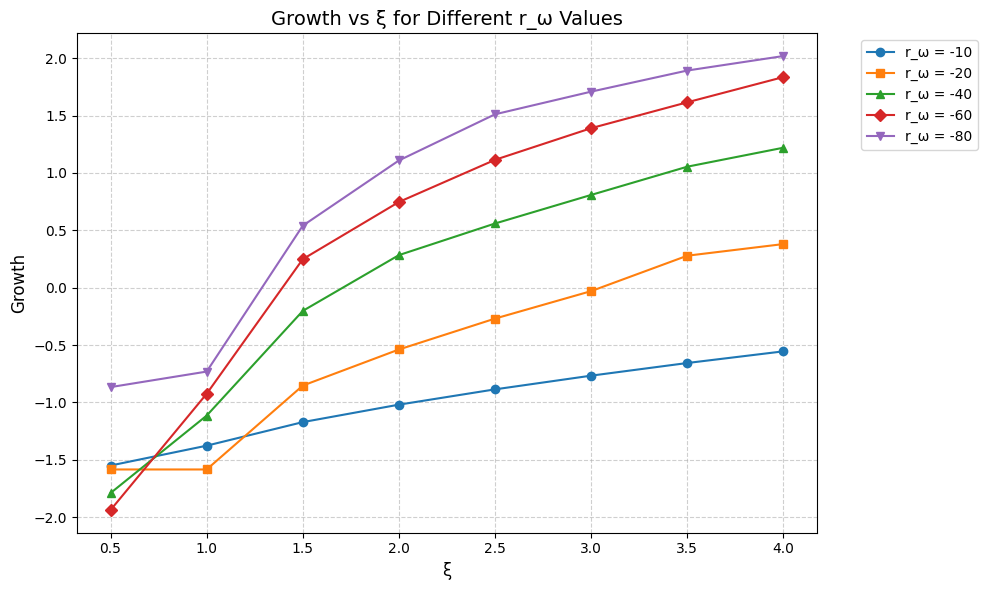

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for r_omega variation
xi = np.array([0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4])
r_omega_values = [-10, -20, -40, -60, -80]
growth_r_omega = np.array([
    [-1.549387, -1.376491, -1.171077, -1.018938, -0.8855893, -0.7662459, -0.6560282, -0.5543918],  # -10
    [-1.583749, -1.583749, -0.8527743, -0.538227, -0.268845, -0.02948668, 0.2790337, 0.3804974],   # -20
    [-1.789241, -1.114372, -0.2018779, 0.2842126, 0.559672, 0.808697, 1.054714, 1.220111],        # -40
    [-1.937141, -0.9240699, 0.2489448, 0.7471915, 1.114584, 1.390369, 1.615866, 1.835798],         # -60
    [-0.8660774, -0.7306981, 0.5406851, 1.109016, 1.511371, 1.708724, 1.892669, 2.019]             # -80
])

plt.figure(figsize=(10, 6))
markers = ['o', 's', '^', 'D', 'v']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, r in enumerate(r_omega_values):
    plt.plot(xi, growth_r_omega[i], marker=markers[i], color=colors[i],linestyle='-', linewidth=1.5,markersize=6,label=f'r_ω = {r}')

plt.xlabel('ξ', fontsize=12)
plt.ylabel('Growth', fontsize=12)
plt.title('Growth vs ξ for Different r_ω Values', fontsize=14)
plt.legend(fontsize=17, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


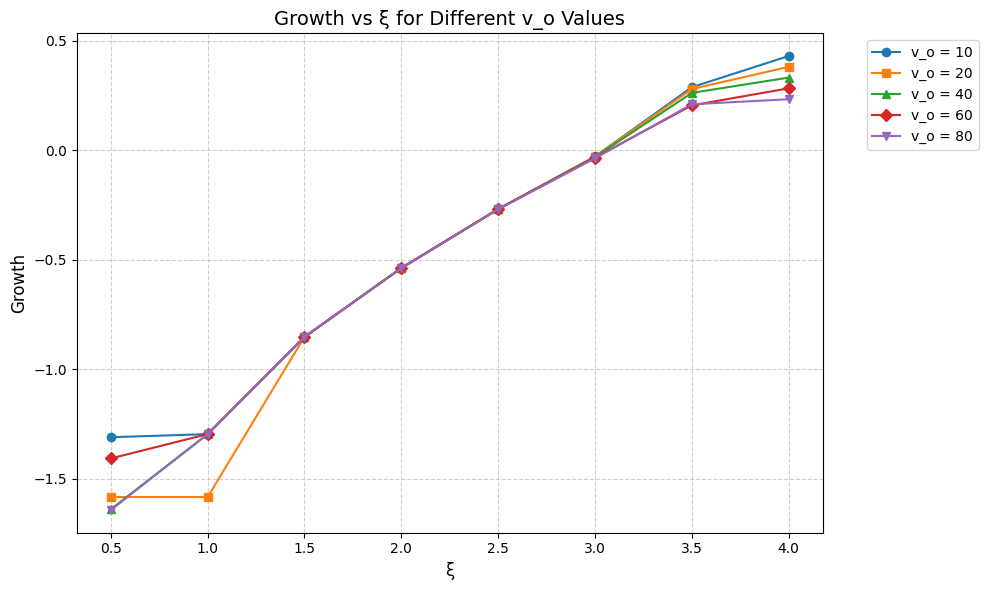

In [ ]:
# Data for v_o variation
v_o_values = [10, 20, 40, 60, 80]
growth_v_o = np.array([
    [-1.310755, -1.296535, -0.8527599, -0.5382098, -0.2687964, -0.02888069, 0.2874421, 0.4297605],  # 10
    [-1.583749, -1.583749, -0.8527743, -0.538227, -0.268845, -0.02948668, 0.2790337, 0.3804974],    # 20
    [-1.639676, -1.296547, -0.8528203, -0.5383443, -0.2691345, -0.03130512, 0.261405, 0.3314103],   # 40
    [-1.407639, -1.296534, -0.8529043, -0.5384707, -0.269436, -0.03375238, 0.2044757, 0.2823903],  # 60
    [-1.643102, -1.296546, -0.8530203, -0.5386977, -0.2702778, -0.03728415, 0.2096809, 0.2324243]   # 80
])

plt.figure(figsize=(10, 6))
for i, v in enumerate(v_o_values):
    plt.plot(xi, growth_v_o[i], marker=markers[i], color=colors[i],linestyle='-', linewidth=1.5,markersize=6,label=f'v_o = {v}')

plt.xlabel('ξ', fontsize=12)
plt.ylabel('Growth', fontsize=12)
plt.title('Growth vs ξ for Different v_o Values', fontsize=14)
plt.legend(fontsize=17, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Read the data file
import pandas as pd

# Best way to read your specific file:
df = pd.read_csv('/home/gayathri/MSc_thesis/Phase2/new/data_files/data.txt', 
                delim_whitespace=True,  # Handles variable whitespace
                skipinitialspace=True,   # Additional whitespace handling
                header=0)                # Ensures first row is header

# Verify reading:
print(df.head())
print("\nColumns:", df.columns.tolist())

# 1. Growth Rate Phase Space Plot
def plot_phase_space():
    plt.figure(figsize=(10,6))
    sc = plt.scatter(df['xi'], df['Selected_Slope'], 
                    c=np.log10(df['Avg_B_strength']),  # Log scale for better visualization
                    s=20 + 50*df['v_o']/df['v_o'].max(),
                    cmap='viridis',
                    alpha=0.7)
    
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel('ξ', fontsize=12)
    plt.ylabel('Growth Rate', fontsize=12)
    cbar = plt.colorbar(sc)
    cbar.set_label('log10(Field Strength)', rotation=270)
    plt.title('MHD Stability Phase Space', fontsize=14)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig('phase_space.png')
    plt.close()

# 2. Parameter Sensitivity Heatmap
def plot_heatmap():
    pivot_df = df.pivot_table(values='Avg_B_strength', 
                            index='v_o', 
                            columns='r_omega',
                            aggfunc=np.median)  # Using median for robustness
    
    plt.figure(figsize=(8,6))
    sns.heatmap(pivot_df, annot=True, fmt=".1f", cmap="YlOrRd", cbar_kws={'label': 'Median Field Strength'})
    plt.title('Field Strength Sensitivity to Parameters')
    plt.tight_layout()
    plt.savefig('parameter_sensitivity.png')
    plt.close()

# 3. Growth vs Saturation Plot
def plot_growth_vs_saturation():
    plt.figure(figsize=(10,6))
    for v in sorted(df['v_o'].unique()):
        subset = df[df['v_o']==v]
        plt.scatter(subset['Selected_Slope'], subset['Avg_B_strength'],label=f'v={v}', alpha=0.6, s=50)
    
    plt.xscale('symlog', linthresh=0.1)
    plt.yscale('log')
    plt.xlabel('Growth Rate (symlog scale)')
    plt.ylabel('Field Strength (log scale)')
    plt.legend(title='Velocity', bbox_to_anchor=(1.05, 1))
    plt.grid(which='both', alpha=0.3)
    plt.title('Saturation vs Growth Rate')
    plt.tight_layout()
    plt.savefig('growth_vs_saturation.png')
    plt.close()

# 4. 3D Parameter Space
def plot_3d_space():
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    sc = ax.scatter(df['xi'], np.log10(-df['r_omega']), np.log10(df['v_o']),c=np.log10(df['Avg_B_strength']),s=30,cmap='plasma')
    
    ax.set_xlabel('ξ')
    ax.set_ylabel('log10(-r_omega)')
    ax.set_zlabel('log10(v_o)')
    ax.set_title('3D Parameter Space (log scales)')
    fig.colorbar(sc, label='log10(Field Strength)')
    plt.tight_layout()
    plt.savefig('3d_parameter_space.png')
    plt.close()

# Generate all plots
plot_phase_space()
plot_heatmap()
plot_growth_vs_saturation()
plot_3d_space()

print("All plots generated successfully!")


  v_o  r_omega   xi  trial  Avg_B_strength  Selected_Slope
0  10    -10.0  0.5    1.0        0.000831       -1.549399
1  10    -10.0  1.0    2.0        0.000991       -1.376488
2  10    -10.0  1.5    3.0        0.000901       -1.171081
3  10    -10.0  2.0    4.0        0.001100       -1.018941
4  10    -10.0  2.5    5.0        0.000959       -0.885579

Columns: ['v_o', 'r_omega', 'xi', 'trial', 'Avg_B_strength', 'Selected_Slope']


/tmp/ipykernel_88235/3978133894.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('/home/gayathri/MSc_thesis/Phase2/new/data_files/data.txt',


TypeError: unsupported operand type(s) for /: 'str' and 'str'

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats

# Read the data


# Function to find the xi value where growth rate crosses zero by linear extrapolation
def find_critical_xi(v0_val, romega_val):
    # Filter data for the given v0 and romega
    filtered_data = data[(data[:, 0] == v0_val) & (data[:, 1] == romega_val)]
    
    if filtered_data.size == 0:
        print(f"No data found for v0={v0_val} and romega={romega_val}.")
        return None, None

    xi = filtered_data[:, 2]
    growth = filtered_data[:, 5]

    # Ensure data is sorted by xi to avoid incorrect regression fitting
    sorted_indices = np.argsort(xi)
    xi = xi[sorted_indices]
    growth = growth[sorted_indices]

    # Perform linear regression to find where the growth rate crosses zero
    slope, intercept, r_value, p_value, std_err = stats.linregress(xi, growth)

    # Extrapolate to find where growth rate would be zero
    critical_xi = -intercept / slope if slope != 0 else None  # xi for zero growth

    return critical_xi, (v0_val, romega_val)

# Now, loop through all unique v0 and romega values and find critical xi
critical_xis = []

unique_v0s = np.unique(v0_values)
unique_romegas = np.unique(romgea_values)

for v0 in unique_v0s:
    for romega in unique_romegas:
        critical_xi, params = find_critical_xi(v0, romega)
        if critical_xi is not None:
            critical_xis.append((critical_xi, params))

# Now let's print the critical values
for critical_xi, (v0_val, romega_val) in critical_xis:
    print(f"Critical xi for v0={v0_val} and romega={romega_val} is {critical_xi:.4f}")
#now do a vo 0n y and romega on x and xi smallest xi as heat map

#heatmap: colour=critical xi, y-vo, x=romega



Critical xi for v0=10.0 and romega=-80.0 is 1.4833
Critical xi for v0=10.0 and romega=-60.0 is 1.6906
Critical xi for v0=10.0 and romega=-40.0 is 1.9804
Critical xi for v0=10.0 and romega=-20.0 is 3.0724
Critical xi for v0=10.0 and romega=-10.0 is 5.7653
Critical xi for v0=20.0 and romega=-80.0 is 1.2365
Critical xi for v0=20.0 and romega=-60.0 is 1.7493
Critical xi for v0=20.0 and romega=-40.0 is 2.1275
Critical xi for v0=20.0 and romega=-20.0 is 3.1040
Critical xi for v0=20.0 and romega=-10.0 is 5.7653
Critical xi for v0=40.0 and romega=-80.0 is 1.6416
Critical xi for v0=40.0 and romega=-60.0 is 1.8159
Critical xi for v0=40.0 and romega=-40.0 is 2.0539
Critical xi for v0=40.0 and romega=-20.0 is 3.1210
Critical xi for v0=40.0 and romega=-10.0 is 5.9333
Critical xi for v0=60.0 and romega=-80.0 is 1.7328
Critical xi for v0=60.0 and romega=-60.0 is 1.7152
Critical xi for v0=60.0 and romega=-40.0 is 2.1034
Critical xi for v0=60.0 and romega=-20.0 is 3.1809
Critical xi for v0=60.0 and rom

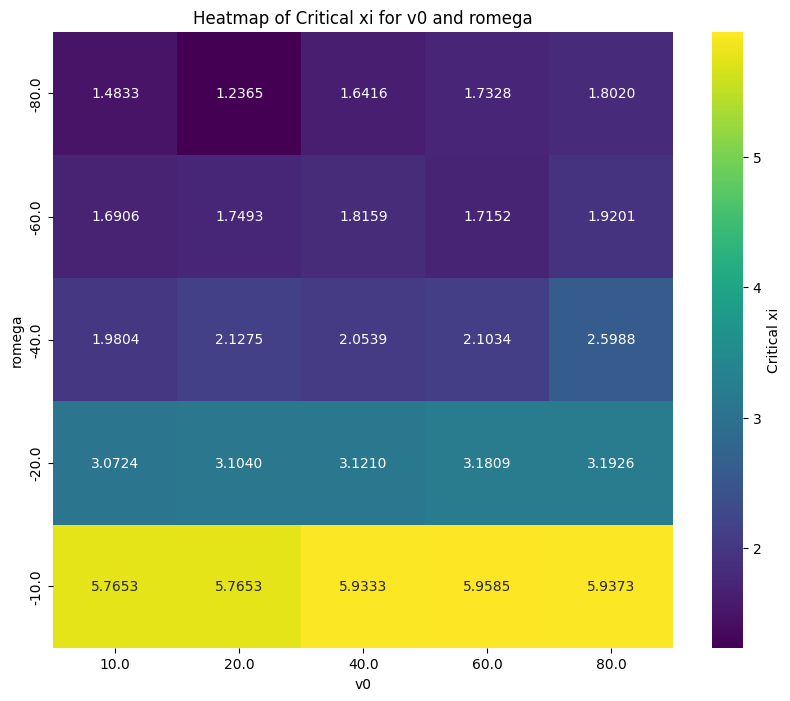

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the data, we can create a 2D array for the heatmap
critical_xis_dict = {}

# Loop through unique v0 and romega values
for v0 in unique_v0s:
    for romega in unique_romegas:
        critical_xi, _ = find_critical_xi(v0, romega)
        if critical_xi is not None:
            if romega not in critical_xis_dict:
                critical_xis_dict[romega] = {}
            critical_xis_dict[romega][v0] = critical_xi

# Convert dictionary to a DataFrame
critical_xis_df = pd.DataFrame.from_dict(critical_xis_dict, orient='index')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(critical_xis_df, annot=True, fmt=".4f", cmap="viridis", cbar_kws={'label': 'Critical xi'})
plt.title("Heatmap of Critical xi for v0 and romega")
plt.xlabel('v0')
plt.ylabel('romega')
plt.show()


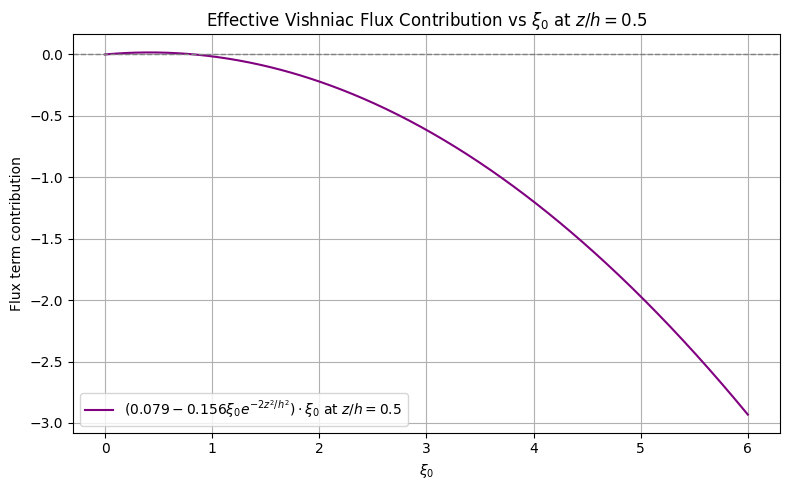

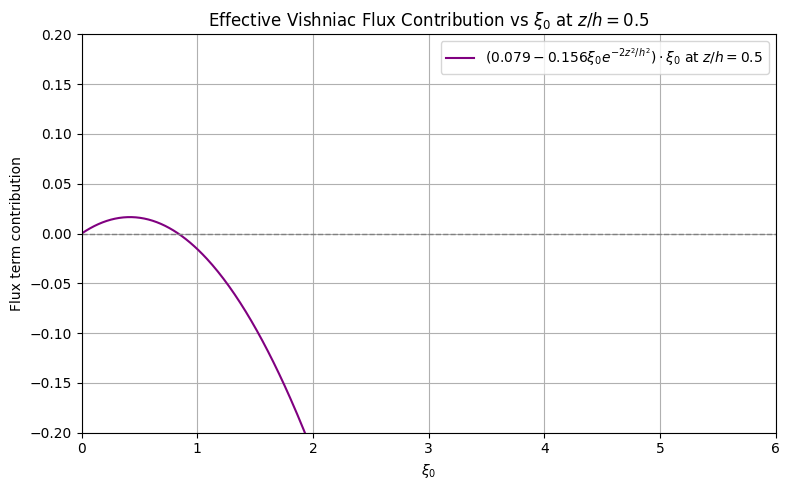

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define variables
z = 0.5  # fixed z/h value
xi0_vals = np.linspace(0, 6, 500)
exp_factor = np.exp(-2 * z**2)  # since z is normalized to h
flux_term = (0.079 - 0.156 * xi0_vals * exp_factor) * xi0_vals

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(xi0_vals, flux_term, label=r'$(0.079 - 0.156\xi_0 e^{-2z^2/h^2}) \cdot \xi_0$ at $z/h = 0.5$', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlabel(r'$\xi_0$')
plt.ylabel('Flux term contribution')
plt.title(r'Effective Vishniac Flux Contribution vs $\xi_0$ at $z/h = 0.5$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(xi0_vals, flux_term, label=r'$(0.079 - 0.156\xi_0 e^{-2z^2/h^2}) \cdot \xi_0$ at $z/h = 0.5$', color='purple')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.xlim(0, 6)
plt.ylim(-0.2, 0.2)
plt.xlabel(r'$\xi_0$')
plt.ylabel('Flux term contribution')
plt.title(r'Effective Vishniac Flux Contribution vs $\xi_0$ at $z/h = 0.5$')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#open trials 400-499 and get the growth rate and decay rate
def parse_trial(trial_num):
    trial_path = os.path.join(data_path, f"trial_{trial_num}", "good_data.txt")
    
    if not os.path.exists(trial_path):
        print(f"Trial {trial_num}: File not found.")
        return None
    
    with open(trial_path, 'r') as file:
        lines = file.readlines()
    
    # Extract numerical B field data: lines 1 to 5000 (excluding header and summary)
    b_vals = []
    for line in lines[1:5001]:  # line[0] is the header
        try:
            val = float(line.strip())
            b_vals.append(val)
        except ValueError:
            continue

    if not b_vals:
        avg_b = 0.0
    else:
        avg_b = sum(b_vals) / len(b_vals)

    # Now grab slope info from summary section
    growth_rate, decay_rate = 0.0, 0.0
    for line in lines[-10:]:  # look near the end
        if "Average growth slope" in line:
            if "None" not in line:
                growth_rate = float(line.split(":")[-1].strip())
        elif "Average decay slope" in line:
            if "None" not in line:
                decay_rate = float(line.split(":")[-1].strip())
    
    # Select which slope to keep
    if growth_rate != 0:
        slope = growth_rate
    elif decay_rate != 0:
        slope = decay_rate
    else:
        slope = 0.0
    
    return (trial_num, avg_b, slope)

#trials 400-499
output_file = os.path.join(data_path, "sat_stat_400_499.txt")
with open(output_file, 'w') as out:
    out.write("Trial\tAvg_B_strength\tSelected_Slope\n")
    for trial in range(400, 496):
        result = parse_trial(trial)
        if result:
            t, avg_b, slope = result
            out.write(f"{t}\t{avg_b:.6e}\t{slope:.6e}\n")
# Read the data
data = np.loadtxt("/home/gayathri/MSc_thesis/Phase2/new/data_files/sat_stat_400_499.txt", skiprows=1)
# Extract columns
trial_numbers = data[:, 0].astype(int)
avg_b_strengths = data[:, 1]
selected_slopes = data[:, 2]



Trial 412: File not found.
Trial 424: File not found.
Trial 436: File not found.
Trial 448: File not found.
Trial 460: File not found.
Trial 472: File not found.
Trial 484: File not found.


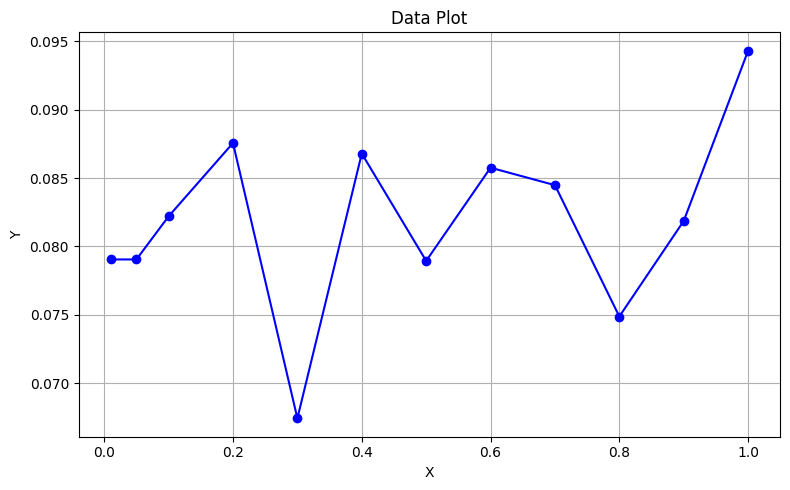

In [ ]:
import matplotlib.pyplot as plt

# Data points
x = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
y = [0.07904717, 0.07904717, 0.08219998, 0.08756343, 0.06742479, 0.08679272, 0.07893953, 0.08575828, 0.08448031, 0.07487381, 0.08186469, 0.09431521]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='o', linestyle='-', color='b')
plt.title('Data Plot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.tight_layout()

plt.show()



/tmp/ipykernel_10102/1324182917.py:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


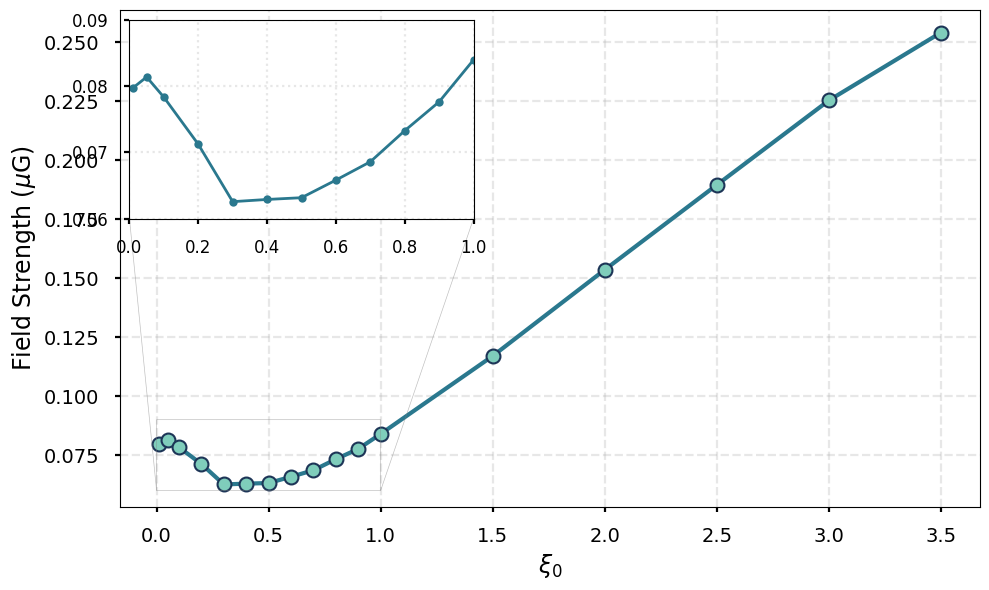

/tmp/ipykernel_10102/1324182917.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


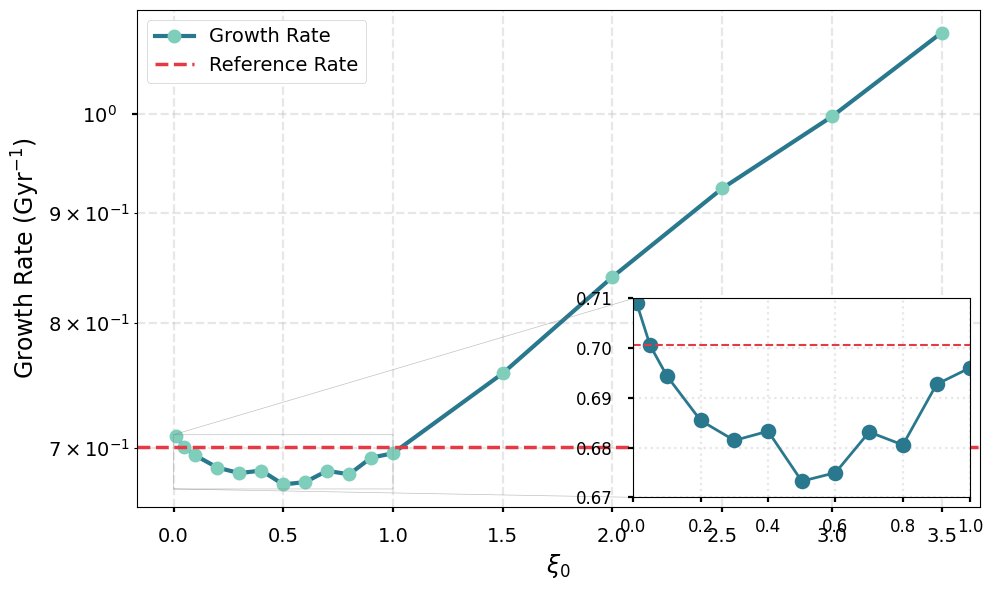

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Common style parameters
plt.style.use('seaborn-v0_8-poster')
params = {
    'axes.labelsize': 17,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3
}
plt.rcParams.update(params)

# ===== FIRST PLOT =====
data1 = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]
xi_vals1, bmax_vals1 = zip(*data1)

fig1, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(xi_vals1, bmax_vals1, 'o-', 
        color='#2a788e', 
        linewidth=3, 
        markersize=10,
        markerfacecolor='#7fcdbb',
        markeredgecolor='#1d3557',
        markeredgewidth=1.5,
        label='Magnetic Field Strength')

ax1.set_xlabel(r'$\xi_0$', fontsize=17)
ax1.set_ylabel(r'Field Strength ($\mu$G)', fontsize=17)
ax1.grid(True, linestyle='--', alpha=0.3)

# Inset plot
axins1 = inset_axes(ax1, width="40%", height="40%", loc='upper left')
axins1.plot(xi_vals1, bmax_vals1, 'o-', color='#2a788e', linewidth=2, markersize=6)
axins1.set_xlim(0, 1)
axins1.set_ylim(0.06, 0.09)
axins1.grid(True, linestyle=':', alpha=0.3)
axins1.tick_params(labelsize=12)
ax1.indicate_inset_zoom(axins1, edgecolor="gray")

plt.tight_layout()
plt.savefig('field_strength_vs_xi.png', dpi=300, bbox_inches='tight')
plt.show()

# ===== SECOND PLOT =====
data2 = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]
xi_vals2, bmax_vals2 = zip(*data2)

fig2, ax2 = plt.subplots(figsize=(10, 6))
main_line = ax2.plot(xi_vals2, bmax_vals2, 'o-', 
                   color='#2a788e', 
                   linewidth=3, 
                   markersize=10,
                   markerfacecolor='#7fcdbb',
                   markeredgecolor='#1d3557',
                   label='Growth Rate')

ref_line = ax2.axhline(y=0.7005608335279412, 
                     color='#e63946', 
                     linestyle='--', 
                     linewidth=2.5,
                     label='Reference Rate')

ax2.set_xlabel(r'$\xi_0$', fontsize=17)
ax2.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontsize=17)
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', alpha=0.3)
ax2.legend(loc='upper left', framealpha=1)

# Inset plot
axins2 = inset_axes(ax2, width="40%", height="40%", loc='lower right')
axins2.plot(xi_vals2[:12], bmax_vals2[:12], 'o-', color='#2a788e', linewidth=2)
axins2.axhline(y=0.7005608335279412, color='#e63946', linestyle='--', linewidth=1.5)
axins2.set_xlim(0, 1)
axins2.set_ylim(0.67, 0.71)
axins2.grid(True, linestyle=':', alpha=0.3)
axins2.tick_params(labelsize=12)
ax2.indicate_inset_zoom(axins2, edgecolor="gray")

plt.tight_layout()
plt.savefig('growth_rate_vs_xi.png', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_87366/3394557909.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=3)


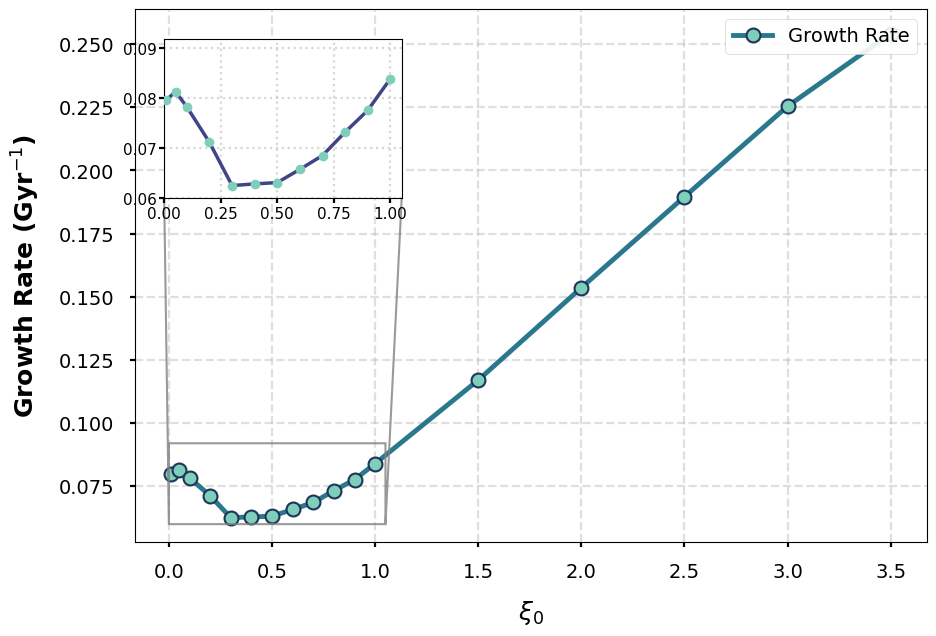

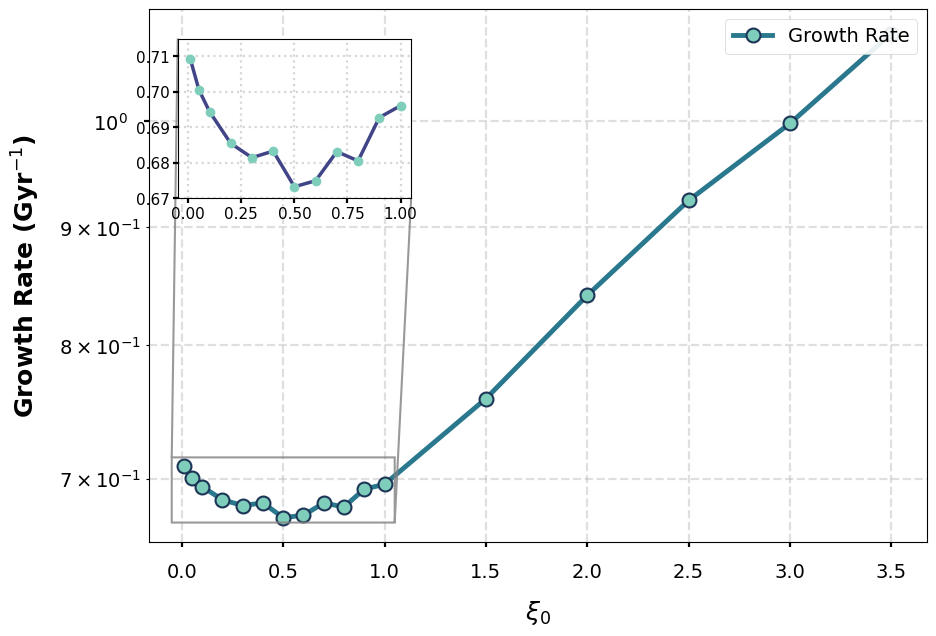

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== ENHANCED STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.titlepad': 20,
    'axes.labelpad': 12
}
plt.rcParams.update(style_params)

# Color scheme with better contrast
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'
inset_color = '#414487'  # Distinct color for inset elements

# ===== PLOT 1: FIELD STRENGTH =====
data1 = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]

data1b = [
    (0.01, -1.52318259147489),
    (0.05, -1.55326803239973),
    (0.1, -1.54526936717783),
    (0.2, -1.56773416803034),
    (0.3, -1.57221394294748),
    (0.4, -1.57440099127928),
    (0.5, -1.56844897394574),
    (0.6, -1.56498531800194),
    (0.7, -1.5654222960967),
    (0.8, -1.5564309287878),
    (0.9, -1.56433991727942),
    (1.0, -1.54805392726902),
    (1.5, -0.981761330137466),
    (2.0, -0.604883498077498),
    (2.5, -0.252105165288985),
    (3.0, 0.103508284398373),
    (3.5, 0.31300677634607)
]

xi_vals1, y_vals1 = zip(*data1)

fig1, ax1 = plt.subplots(figsize=(10, 7))  # Slightly taller figure

# Main plot with enhanced styling
main_line1 = ax1.plot(xi_vals1, y_vals1, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

# Axis setup with padding
ax1.set_xlabel(r'$\xi_0$', fontweight='bold')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax1.grid(True, alpha=0.4, linestyle='--')

# Inset with better positioning and styling
axins1 = inset_axes(ax1, width="30%", height="30%", loc='upper left', 
                   borderpad=1.5)
inset_line1 = axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
                         color=inset_color,
                         linewidth=2.5,
                         markersize=7,
                         markerfacecolor=marker_face,
                         markeredgecolor=marker_edge,
                         zorder=4)

# Inset axis formatting
axins1.tick_params(labelsize=11, pad=2)
axins1.set_xlim(0, 1.05)  # Slightly extended to prevent label clipping
axins1.set_ylim(0.06, 0.092)
axins1.grid(True, linestyle=':', alpha=0.5)
axins1.set_xticks(np.linspace(0, 1, 5))
axins1.set_yticks(np.linspace(0.06, 0.09, 4))

# Inset indicator with subtle styling
ax1.indicate_inset_zoom(axins1, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax1.legend(loc='upper right', framealpha=0.9)

# ===== PLOT 2: GROWTH RATE (LOG SCALE) =====
data2 = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]
xi_vals2, y_vals2 = zip(*data2)

fig2, ax2 = plt.subplots(figsize=(10, 7))

# Main plot with log scale
main_line2 = ax2.plot(xi_vals2, y_vals2, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

ax2.set_xlabel(r'$\xi_0$', fontweight='bold')
ax2.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, which='both', alpha=0.4, linestyle='--')

# Inset with linear scale
axins2 = inset_axes(ax2, width="30%", height="30%", loc='upper left',
                   borderpad=1.5)
inset_line2 = axins2.plot(xi_vals2[:12], y_vals2[:12], 'o-', 
                         color=inset_color,
                         linewidth=2.5,
                         markersize=7,
                         markerfacecolor=marker_face,
                         markeredgecolor=marker_edge,
                         zorder=4)

# Inset formatting with non-overlapping ticks
axins2.tick_params(labelsize=11, pad=2)
axins2.set_xlim(-0.05, 1.05)  # Extended slightly
axins2.set_ylim(0.67, 0.715)
axins2.grid(True, linestyle=':', alpha=0.5)
axins2.set_xticks(np.linspace(0, 1, 5))
axins2.set_yticks(np.linspace(0.67, 0.71, 5))

# Subtle zoom indicator
ax2.indicate_inset_zoom(axins2, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax2.legend(loc='upper right', framealpha=0.9)

# ===== FINAL TOUCHES & SAVE =====
for fig in [fig1, fig2]:
    fig.tight_layout(pad=3)
    fig.patch.set_facecolor('white')

fig1.savefig('field_strength_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
fig2.savefig('growth_rate_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()


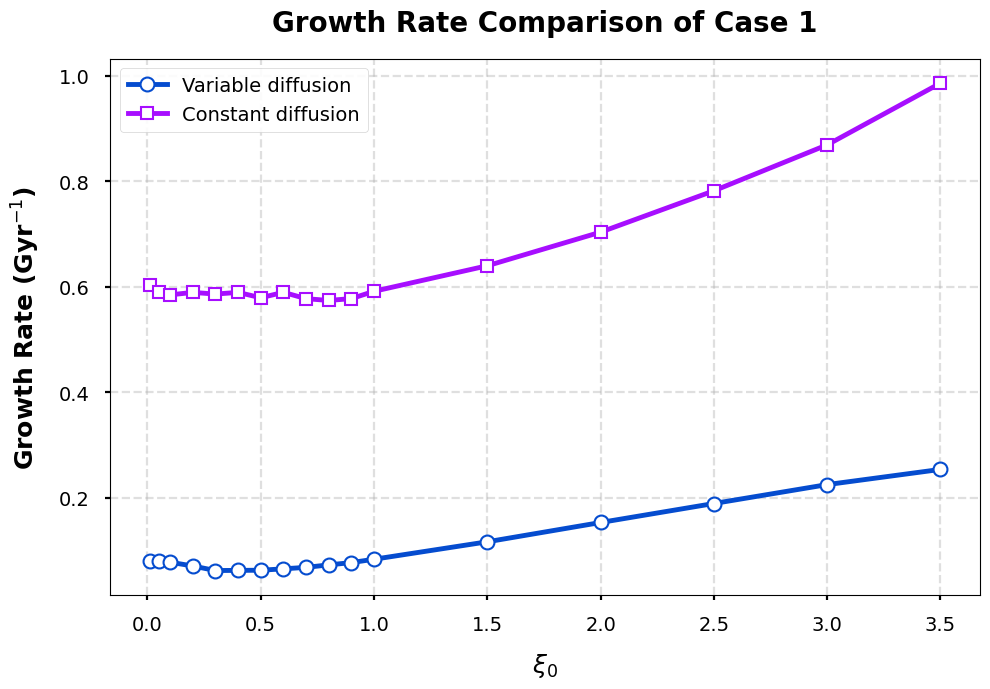

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== ENHANCED STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.titlepad': 20,
    'axes.labelpad': 12
}
plt.rcParams.update(style_params)

# Color scheme with better contrast
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'
inset_color = '#414487'  # Distinct color for inset elements

# ===== PLOT 1: FIELD STRENGTH =====
data1 = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]

data1b = [
    (0.01, 0.602652729357182),
    (0.05, 0.590466358729126),
    (0.1, 0.584807442689805),
    (0.2, 0.589444841529212),
    (0.3, 0.586306066538472),
    (0.4, 0.589493110996581),
    (0.5, 0.579281892762169),
    (0.6, 0.589618552298357),
    (0.7, 0.577560676221708),
    (0.8, 0.574215691752654),
    (0.9, 0.577700823569756),
    (1.0, 0.591564525494652),
    (1.5, 0.639937633964839),
    (2.0, 0.703598111534615),
    (2.5, 0.781941845587151),
    (3.0, 0.868930922498187),
    (3.5, 0.985862966279872)
]

xi_vals1, y_vals1 = zip(*data1)
xi_vals1b, y_vals1b = zip(*data1b)  # Unpack data1b

fig1, ax1 = plt.subplots(figsize=(10, 7))  # Slightly taller figure

# Plot data1 (original)
main_line1 = ax1.plot(xi_vals1, y_vals1, 'o-', 
                     color="#054ccf",  # Default blue (or specify your main_color)
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor='white',
                     markeredgecolor='#054ccf',
                     markeredgewidth=1.5,
                     label='Variable diffusion',
                     zorder=3)

# Plot data1b (new dataset)
main_line1b = ax1.plot(xi_vals1b, y_vals1b, 's-',  # Using squares ('s') for distinction
                      color="#a70eff",  # Default orange (or another contrasting color)
                      linewidth=3.5,
                      markersize=8,
                      markerfacecolor='white',
                      markeredgecolor='#a70eff',
                      markeredgewidth=1.5,
                      label='Constant diffusion',
                      zorder=3)

# Axis setup with padding
ax1.set_xlabel(r'$\xi_0$', fontweight='bold')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax1.grid(True, alpha=0.4, linestyle='--')
# ax1.set_yscale('log')  # Set y-axis to log scale for better visibility
# # Inset for data1 (original)
# axins1 = inset_axes(ax1, width="30%", height="30%", loc='upper left', borderpad=1.5)
# inset_line1 = axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
#                          color='#1f77b4',
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor='white',
#                          markeredgecolor='#1f77b4',
#                          zorder=4)

# # Inset for data1b (new dataset)
# inset_line1b = axins1.plot(xi_vals1b[:12], y_vals1b[:12], 's-', 
#                           color='#ff7f0e',
#                           linewidth=2.5,
#                           markersize=6,
#                           markerfacecolor='white',
#                           markeredgecolor='#ff7f0e',
#                           zorder=4)

# # Inset axis formatting (shared for both datasets)
# axins1.tick_params(labelsize=11, pad=2)
# axins1.set_xlim(0, 1.05)
# axins1.set_ylim(min(y_vals1b[:12])*1.1, max(y_vals1[:12])*1.1)  # Adjust ylim to fit both
# axins1.grid(True, linestyle=':', alpha=0.5)
# axins1.set_xticks(np.linspace(0, 1, 5))
# axins1.set_yticks(np.linspace(min(y_vals1b[:12]), max(y_vals1[:12]), 4))

# Inset indicator and legend
# ax1.indicate_inset_zoom(axins1, edgecolor="gray", alpha=0.8, linewidth=1.5)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.set_title('Growth Rate Comparison of Case 1', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


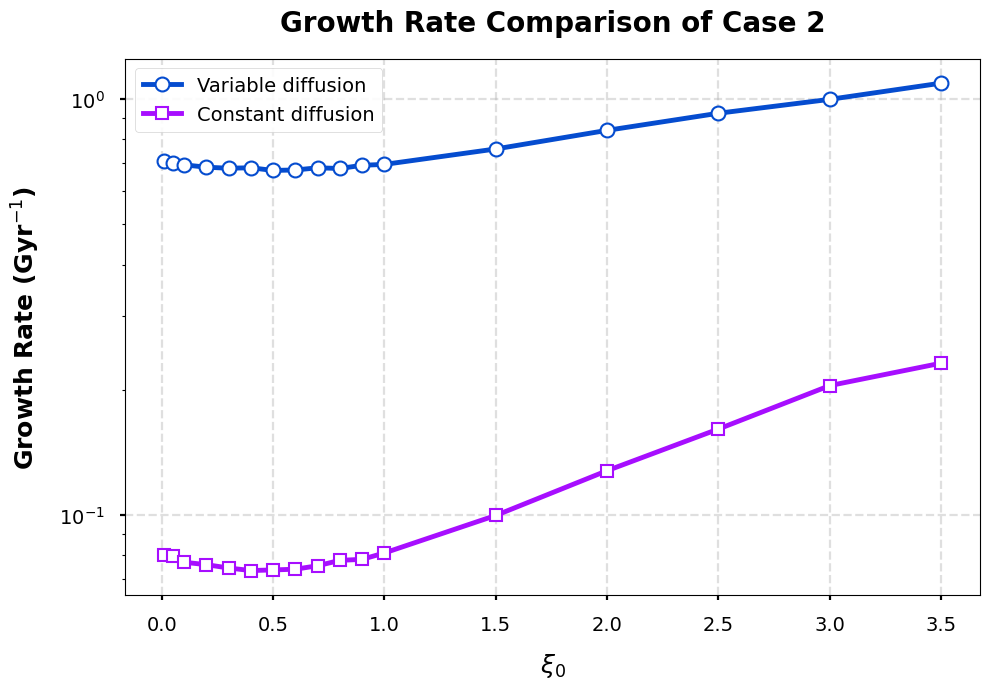

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== ENHANCED STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.titlepad': 20,
    'axes.labelpad': 12
}
plt.rcParams.update(style_params)

# Color scheme with better contrast
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'
inset_color = '#414487'  # Distinct color for inset elements

# ===== PLOT 1: FIELD STRENGTH =====
data1 = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]

data1b = [
    (0.01, 0.0800989388839954),
    (0.05, 0.0797455106127487),
    (0.1,  0.0769985331810851),
    (0.2,  0.0759830960920379),
    (0.3,  0.0745873301967256),
    (0.4,  0.0735421641128898),
    (0.5,  0.0737928041015518),
    (0.6,  0.0740883670106789),
    (0.7,  0.0755273452286956),
    (0.8,  0.0778036800110734),
    (0.9,  0.0782535341629432),
    (1.0,  0.0810688919925093),
    (1.5,  0.0997649711589991),
    (2.0,  0.127818349914435),
    (2.5,  0.160951388202585),
    (3.0,  0.204679375702366),
    (3.5,  0.231729511992282),
]

xi_vals1, y_vals1 = zip(*data1)
xi_vals1b, y_vals1b = zip(*data1b)  # Unpack data1b

fig1, ax1 = plt.subplots(figsize=(10, 7))  # Slightly taller figure

# Plot data1 (original)
main_line1 = ax1.plot(xi_vals1, y_vals1, 'o-', 
                     color="#054ccf",  # Default blue (or specify your main_color)
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor='white',
                     markeredgecolor='#054ccf',
                     markeredgewidth=1.5,
                     label='Variable diffusion',
                     zorder=3)

# Plot data1b (new dataset)
main_line1b = ax1.plot(xi_vals1b, y_vals1b, 's-',  # Using squares ('s') for distinction
                      color="#a70eff",  # Default orange (or another contrasting color)
                      linewidth=3.5,
                      markersize=8,
                      markerfacecolor='white',
                      markeredgecolor='#a70eff',
                      markeredgewidth=1.5,
                      label='Constant diffusion',
                      zorder=3)

# Axis setup with padding
ax1.set_xlabel(r'$\xi_0$', fontweight='bold')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax1.grid(True, alpha=0.4, linestyle='--')
ax1.set_yscale('log')  # Set y-axis to log scale for better visibility
# # Inset for data1 (original)
# axins1 = inset_axes(ax1, width="30%", height="30%", loc='upper left', borderpad=1.5)
# inset_line1 = axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
#                          color='#1f77b4',
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor='white',
#                          markeredgecolor='#1f77b4',
#                          zorder=4)

# # Inset for data1b (new dataset)
# inset_line1b = axins1.plot(xi_vals1b[:12], y_vals1b[:12], 's-', 
#                           color='#ff7f0e',
#                           linewidth=2.5,
#                           markersize=6,
#                           markerfacecolor='white',
#                           markeredgecolor='#ff7f0e',
#                           zorder=4)

# # Inset axis formatting (shared for both datasets)
# axins1.tick_params(labelsize=11, pad=2)
# axins1.set_xlim(0, 1.05)
# axins1.set_ylim(min(y_vals1b[:12])*1.1, max(y_vals1[:12])*1.1)  # Adjust ylim to fit both
# axins1.grid(True, linestyle=':', alpha=0.5)
# axins1.set_xticks(np.linspace(0, 1, 5))
# axins1.set_yticks(np.linspace(min(y_vals1b[:12]), max(y_vals1[:12]), 4))

# Inset indicator and legend
# ax1.indicate_inset_zoom(axins1, edgecolor="gray", alpha=0.8, linewidth=1.5)
ax1.legend(loc='upper left', framealpha=0.9)
ax1.set_title('Growth Rate Comparison of Case 2', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()


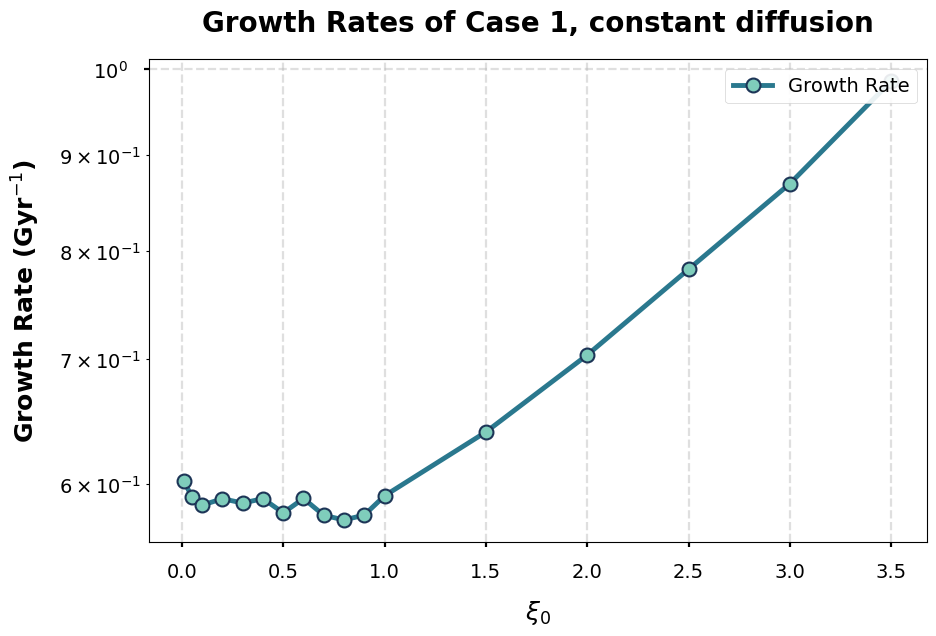

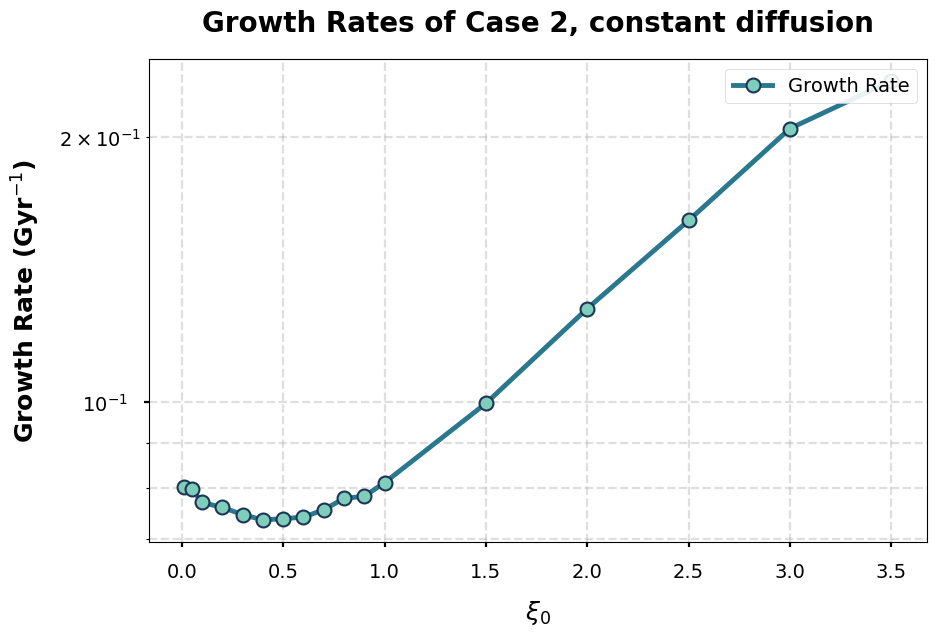

In [30]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== ENHANCED STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.titlepad': 20,
    'axes.labelpad': 12
}
plt.rcParams.update(style_params)

# Color scheme with better contrast
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'
inset_color = '#414487'  # Distinct color for inset elements

# ===== PLOT 1: FIELD STRENGTH =====

data1 = [
    (0.01, 0.602652729357182),
    (0.05, 0.590466358729126),
    (0.1, 0.584807442689805),
    (0.2, 0.589444841529212),
    (0.3, 0.586306066538472),
    (0.4, 0.589493110996581),
    (0.5, 0.579281892762169),
    (0.6, 0.589618552298357),
    (0.7, 0.577560676221708),
    (0.8, 0.574215691752654),
    (0.9, 0.577700823569756),
    (1.0, 0.591564525494652),
    (1.5, 0.639937633964839),
    (2.0, 0.703598111534615),
    (2.5, 0.781941845587151),
    (3.0, 0.868930922498187),
    (3.5, 0.985862966279872)
]

xi_vals1, y_vals1 = zip(*data1)

fig1, ax1 = plt.subplots(figsize=(10, 7))  # Slightly taller figure

# Main plot with enhanced styling
main_line1 = ax1.plot(xi_vals1, y_vals1, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

# Axis setup with padding
ax1.set_xlabel(r'$\xi_0$', fontweight='bold')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax1.set_yscale('log')  # Log scale for better visibility of growth rates
ax1.grid(True, alpha=0.4, linestyle='--')

# # Inset with better positioning and styling
# axins1 = inset_axes(ax1, width="30%", height="30%", loc='upper left', 
#                    borderpad=1.5)
# inset_line1 = axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
#                          color=inset_color,
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor=marker_face,
#                          markeredgecolor=marker_edge,
#                          zorder=4)

# # Inset axis formatting
# axins1.tick_params(labelsize=11, pad=2)
# axins1.set_xlim(0, 1.05)  # Slightly extended to prevent label clipping
# axins1.set_ylim(0.06, 0.092)
# axins1.grid(True, linestyle=':', alpha=0.5)
# axins1.set_xticks(np.linspace(0, 1, 5))
# axins1.set_yticks(np.linspace(0.06, 0.09, 4))

# Inset indicator with subtle styling
# ax1.indicate_inset_zoom(axins1, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax1.legend(loc='upper right', framealpha=0.9)
ax1.set_title('Growth Rates of Case 1, constant diffusion', fontsize=20, fontweight='bold')

# ===== PLOT 2: GROWTH RATE (LOG SCALE) =====
data2 = [
    (0.01, 0.0800989388839954),
    (0.05, 0.0797455106127487),
    (0.1,  0.0769985331810851),
    (0.2,  0.0759830960920379),
    (0.3,  0.0745873301967256),
    (0.4,  0.0735421641128898),
    (0.5,  0.0737928041015518),
    (0.6,  0.0740883670106789),
    (0.7,  0.0755273452286956),
    (0.8,  0.0778036800110734),
    (0.9,  0.0782535341629432),
    (1.0,  0.0810688919925093),
    (1.5,  0.0997649711589991),
    (2.0,  0.127818349914435),
    (2.5,  0.160951388202585),
    (3.0,  0.204679375702366),
    (3.5,  0.231729511992282),
]
xi_vals2, y_vals2 = zip(*data2)

fig2, ax2 = plt.subplots(figsize=(10, 7))

# Main plot with log scale
main_line2 = ax2.plot(xi_vals2, y_vals2, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

ax2.set_xlabel(r'$\xi_0$', fontweight='bold')
ax2.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
ax2.set_yscale('log')
ax2.grid(True, which='both', alpha=0.4, linestyle='--')

# Inset with linear scale
# axins2 = inset_axes(ax2, width="30%", height="30%", loc='upper left',
#                    borderpad=1.5)
# inset_line2 = axins2.plot(xi_vals2[:12], y_vals2[:12], 'o-', 
#                          color=inset_color,
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor=marker_face,
#                          markeredgecolor=marker_edge,
#                          zorder=4)

# # Inset formatting with non-overlapping ticks
# axins2.tick_params(labelsize=11, pad=2)
# axins2.set_xlim(-0.05, 1.05)  # Extended slightly
# axins2.set_ylim(0.67, 0.715)
# axins2.grid(True, linestyle=':', alpha=0.5)
# axins2.set_xticks(np.linspace(0, 1, 5))
# axins2.set_yticks(np.linspace(0.67, 0.71, 5))

# # Subtle zoom indicator
# ax2.indicate_inset_zoom(axins2, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax2.legend(loc='upper right', framealpha=0.9)
ax2.set_title('Growth Rates of Case 2, constant diffusion', fontsize=20, fontweight='bold')
# ===== FINAL TOUCHES & SAVE =====
for fig in [fig1, fig2]:
    fig.tight_layout(pad=3)
    fig.patch.set_facecolor('white')

fig1.savefig('field_strength_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
fig2.savefig('growth_rate_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()


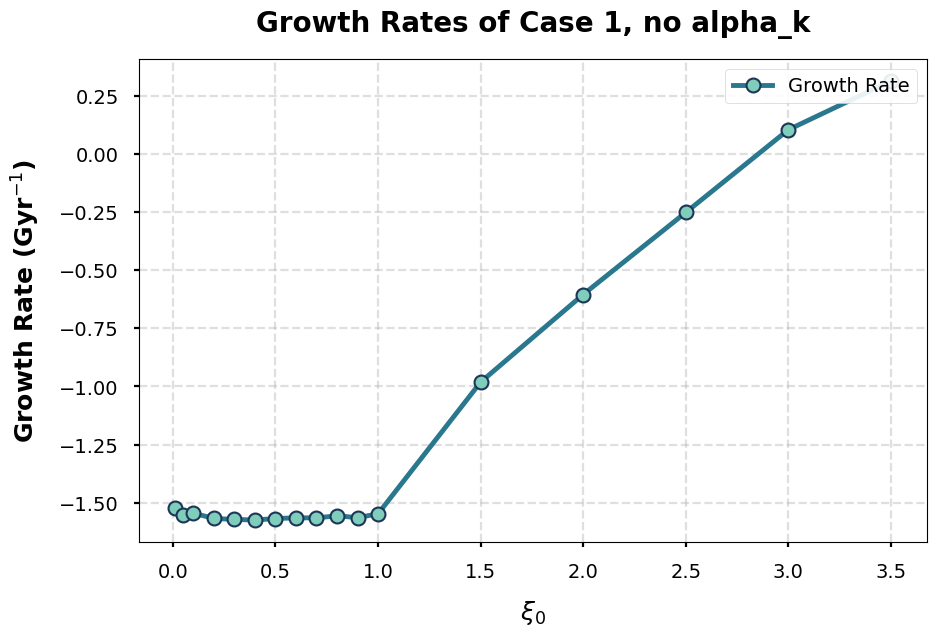

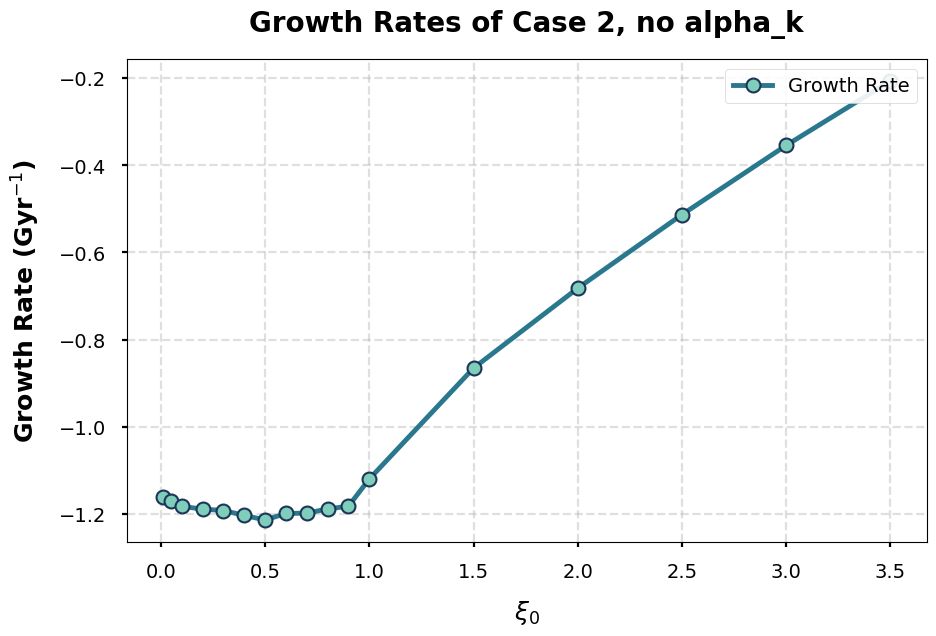

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== ENHANCED STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.3,
    'grid.linestyle': '--',
    'axes.titlepad': 20,
    'axes.labelpad': 12
}
plt.rcParams.update(style_params)

# Color scheme with better contrast
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'
inset_color = '#414487'  # Distinct color for inset elements

# ===== PLOT 1: FIELD STRENGTH =====

data1 = [
    (0.01, -1.52318259147489),
    (0.05, -1.55326803239973),
    (0.1, -1.54526936717783),
    (0.2, -1.56773416803034),
    (0.3, -1.57221394294748),
    (0.4, -1.57440099127928),
    (0.5, -1.56844897394574),
    (0.6, -1.56498531800194),
    (0.7, -1.5654222960967),
    (0.8, -1.5564309287878),
    (0.9, -1.56433991727942),
    (1.0, -1.54805392726902),
    (1.5, -0.981761330137466),
    (2.0, -0.604883498077498),
    (2.5, -0.252105165288985),
    (3.0, 0.103508284398373),
    (3.5, 0.31300677634607)
]

xi_vals1, y_vals1 = zip(*data1)

fig1, ax1 = plt.subplots(figsize=(10, 7))  # Slightly taller figure

# Main plot with enhanced styling
main_line1 = ax1.plot(xi_vals1, y_vals1, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

# Axis setup with padding
ax1.set_xlabel(r'$\xi_0$', fontweight='bold')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
# ax1.set_yscale('log')  # Log scale for better visibility of growth rates
ax1.grid(True, alpha=0.4, linestyle='--')

# # Inset with better positioning and styling
# axins1 = inset_axes(ax1, width="30%", height="30%", loc='upper left', 
#                    borderpad=1.5)
# inset_line1 = axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
#                          color=inset_color,
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor=marker_face,
#                          markeredgecolor=marker_edge,
#                          zorder=4)

# # Inset axis formatting
# axins1.tick_params(labelsize=11, pad=2)
# axins1.set_xlim(0, 1.05)  # Slightly extended to prevent label clipping
# axins1.set_ylim(0.06, 0.092)
# axins1.grid(True, linestyle=':', alpha=0.5)
# axins1.set_xticks(np.linspace(0, 1, 5))
# axins1.set_yticks(np.linspace(0.06, 0.09, 4))

# Inset indicator with subtle styling
# ax1.indicate_inset_zoom(axins1, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax1.legend(loc='upper right', framealpha=0.9)
ax1.set_title('Growth Rates of Case 1, no alpha_k', fontsize=20, fontweight='bold')

# ===== PLOT 2: GROWTH RATE (LOG SCALE) =====
data2 = [
    (0.01, -1.16023573825454),
    (0.05, -1.17077534796459),
    (0.1, -1.18287012068588),
    (0.2, -1.18912605071666),
    (0.3, -1.19229687175264),
    (0.4, -1.20355700634937),
    (0.5, -1.2140306166018),
    (0.6, -1.19906291813348),
    (0.7, -1.19832350333184),
    (0.8, -1.18879647044251),
    (0.9, -1.18233215113483),
    (1.0, -1.11986893770399),
    (1.5, -0.865467668682421),
    (2.0, -0.682067651708863),
    (2.5, -0.513167196190722),
    (3.0, -0.354261806069164),
    (3.5, -0.206501289023403)
]


xi_vals2, y_vals2 = zip(*data2)

fig2, ax2 = plt.subplots(figsize=(10, 7))

# Main plot with log scale
main_line2 = ax2.plot(xi_vals2, y_vals2, 'o-', 
                     color=main_color,
                     linewidth=3.5,
                     markersize=10,
                     markerfacecolor=marker_face,
                     markeredgecolor=marker_edge,
                     markeredgewidth=1.5,
                     label='Growth Rate',
                     zorder=3)

ax2.set_xlabel(r'$\xi_0$', fontweight='bold')
ax2.set_ylabel(r'Growth Rate (Gyr$^{-1}$)', fontweight='bold')
# ax2.set_yscale('log')
ax2.grid(True, which='both', alpha=0.4, linestyle='--')

# Inset with linear scale
# axins2 = inset_axes(ax2, width="30%", height="30%", loc='upper left',
#                    borderpad=1.5)
# inset_line2 = axins2.plot(xi_vals2[:12], y_vals2[:12], 'o-', 
#                          color=inset_color,
#                          linewidth=2.5,
#                          markersize=7,
#                          markerfacecolor=marker_face,
#                          markeredgecolor=marker_edge,
#                          zorder=4)

# # Inset formatting with non-overlapping ticks
# axins2.tick_params(labelsize=11, pad=2)
# axins2.set_xlim(-0.05, 1.05)  # Extended slightly
# axins2.set_ylim(0.67, 0.715)
# axins2.grid(True, linestyle=':', alpha=0.5)
# axins2.set_xticks(np.linspace(0, 1, 5))
# axins2.set_yticks(np.linspace(0.67, 0.71, 5))

# # Subtle zoom indicator
# ax2.indicate_inset_zoom(axins2, edgecolor="gray", alpha=0.8, linewidth=1.5)

ax2.legend(loc='upper right', framealpha=0.9)
ax2.set_title('Growth Rates of Case 2, no alpha_k', fontsize=20, fontweight='bold')
# ===== FINAL TOUCHES & SAVE =====
for fig in [fig1, fig2]:
    fig.tight_layout(pad=3)
    fig.patch.set_facecolor('white')

fig1.savefig('field_strength_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
fig2.savefig('growth_rate_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')

plt.show()


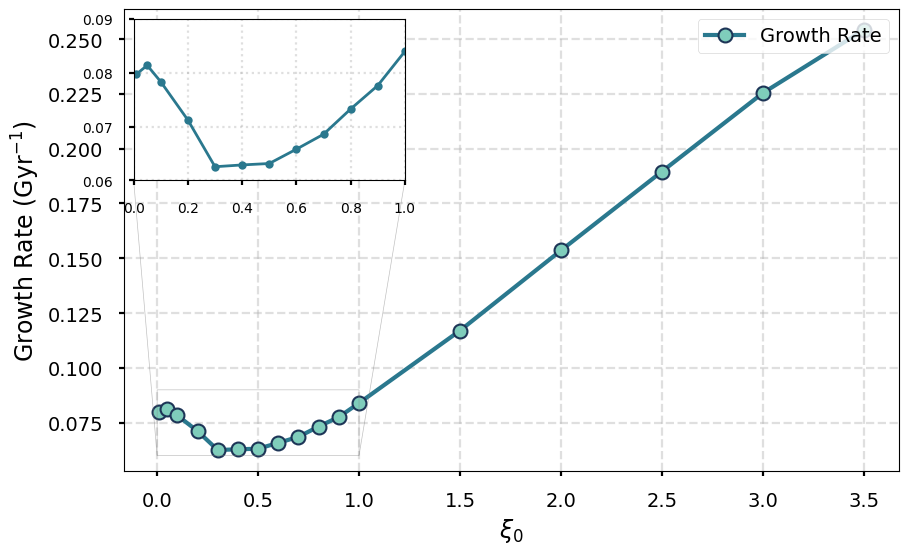

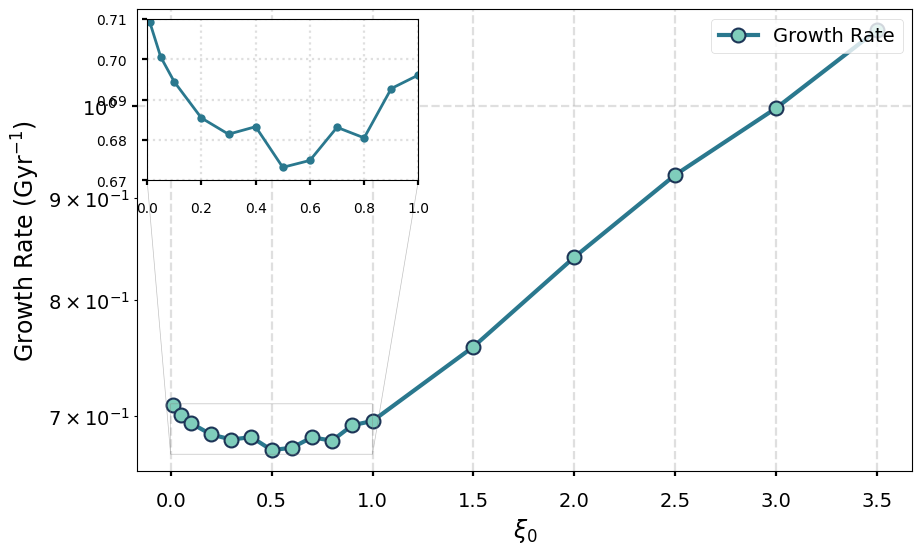

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# ===== COMMON STYLE SETTINGS =====
plt.style.use('seaborn-v0_8-poster')
style_params = {
    'axes.labelsize': 17,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'grid.alpha': 0.4,
    'grid.linestyle': '--'
}
plt.rcParams.update(style_params)

# Shared color scheme
main_color = '#2a788e'
accent_color = '#e63946'
marker_face = '#7fcdbb'
marker_edge = '#1d3557'

# ===== PLOT 1: FIELD STRENGTH =====
data1 = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]
xi_vals1, y_vals1 = zip(*data1)

fig1, ax1 = plt.subplots(figsize=(10, 6))

# Main plot
ax1.plot(xi_vals1, y_vals1, 'o-', 
        color=main_color,
        linewidth=3,
        markersize=10,
        markerfacecolor=marker_face,
        markeredgecolor=marker_edge,
        markeredgewidth=1.5,
        label='Growth Rate')

# Reference line (using same value as growth rate plot for consistency)
ref_value = 0.7005608335279412
reff_value=refval=0.25799009927734473

# Axis setup
ax1.set_xlabel(r'$\xi_0$')
ax1.set_ylabel(r'Growth Rate (Gyr$^{-1}$)')
ax1.grid(True)

# Inset (upper left for both plots)
axins1 = inset_axes(ax1, width="35%", height="35%", loc='upper left')
axins1.plot(xi_vals1[:12], y_vals1[:12], 'o-', 
           color=main_color,
           linewidth=2,
           markersize=6)
axins1.tick_params(labelsize=10)

axins1.axhline(y=ref_value, color=accent_color, 
              linestyle='--', linewidth=1.5)
axins1.set_xlim(0, 1)
axins1.set_ylim(0.06, 0.09)
axins1.grid(True, linestyle=':')
ax1.indicate_inset_zoom(axins1, edgecolor="gray")

ax1.legend(loc='upper right')

# ===== PLOT 2: GROWTH RATE =====
data2 = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]
xi_vals2, y_vals2 = zip(*data2)

fig2, ax2 = plt.subplots(figsize=(10, 6))

# Main plot
ax2.plot(xi_vals2, y_vals2, 'o-', 
        color=main_color,
        linewidth=3,
        markersize=10,
        markerfacecolor=marker_face,
        markeredgecolor=marker_edge,
        markeredgewidth=1.5,
        label='Growth Rate')


ax2.set_xlabel(r'$\xi_0$')
ax2.set_ylabel(r'Growth Rate (Gyr$^{-1}$)')
ax2.set_yscale('log')
ax2.grid(True)

# Inset (upper left, matching first plot)
axins2 = inset_axes(ax2, width="35%", height="35%", loc='upper left')
axins2.plot(xi_vals2[:12], y_vals2[:12], 'o-', 
           color=main_color,
           linewidth=2,
           markersize=6)
#set tick marks fontsixe
axins2.tick_params(labelsize=10)


axins2.set_xlim(0, 1)
axins2.set_ylim(0.67, 0.71)
axins2.grid(True, linestyle=':')
ax2.indicate_inset_zoom(axins2, edgecolor="gray")

ax2.legend(loc='upper right')

# ===== SAVE BOTH PLOTS =====
fig1.savefig('field_strength_consistent.png', dpi=300, bbox_inches='tight')
fig2.savefig('growth_rate_consistent.png', dpi=300, bbox_inches='tight')

plt.show()


/tmp/ipykernel_10102/1243432594.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


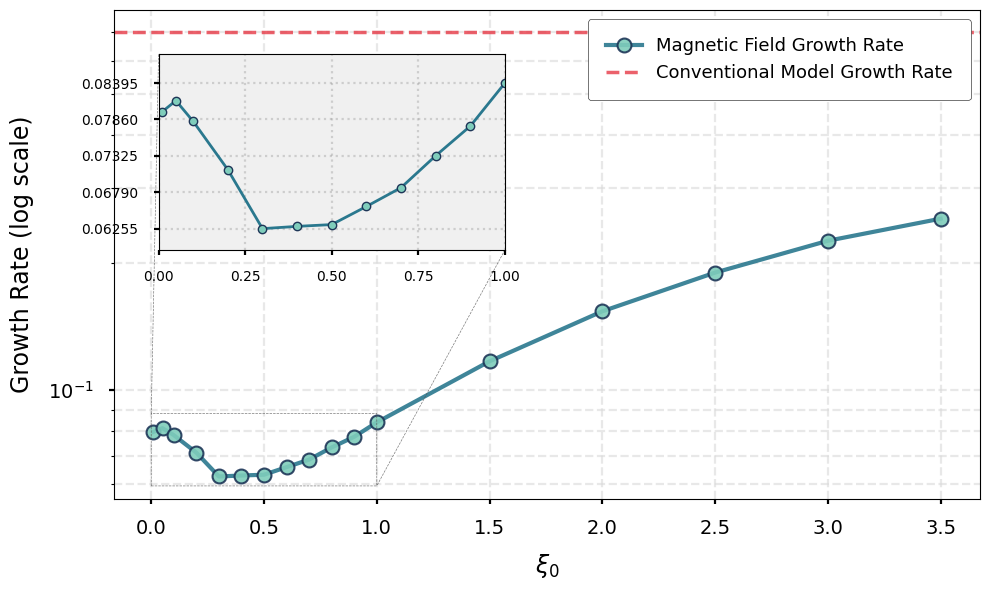

/tmp/ipykernel_10102/1243432594.py:190: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


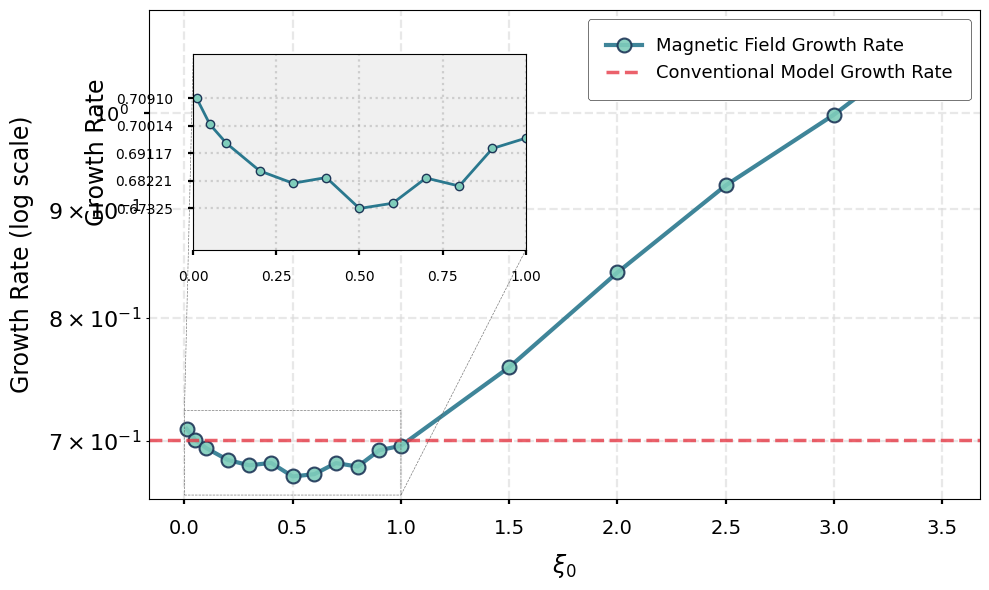

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Data: (xi_0, B_max)
data = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]

# Split into x and y
xi_vals, bmax_vals = zip(*data)

# Create figure with modern style
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Main plot with enhanced styling
main_line = ax.plot(xi_vals, bmax_vals, 'o-', 
                   color='#2a788e', 
                   linewidth=3, 
                   markersize=10,
                   markerfacecolor='#7fcdbb',
                   markeredgecolor='#1d3557',
                   markeredgewidth=1.5,
                   alpha=0.9,
                   label='Magnetic Field Growth Rate')

# Reference line with improved styling
ref_line = ax.axhline(y=0.7005608335279412, 
                     color='#e63946', 
                     linestyle='--', 
                     linewidth=2.5,
                     alpha=0.8,
                     label='Conventional Model Growth Rate')

# Axis labels with LaTeX and larger font
ax.set_xlabel(r'$\xi_0$', fontsize=17, labelpad=10)
ax.set_ylabel(r'Growth Rate (log scale)', fontsize=17, labelpad=10)
ax.set_yscale('log')
#increase tick size
ax.tick_params(axis='both', which='major', labelsize=14)
#increase font size

# Grid and tick customization
ax.grid(True, which='both', linestyle='--', alpha=0.6, color='#d9d9d9')
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend with better positioning and styling
legend = ax.legend(loc='upper right', fontsize=13, framealpha=1, 
                  edgecolor='#333333', facecolor='white',
                  borderpad=1, handlelength=2)

# Inset plot with enhanced styling
axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
axins.plot(xi_vals, bmax_vals, 'o-', 
          color='#2a788e', 
          linewidth=2, 
          markersize=6,
          markerfacecolor='#7fcdbb',
          markeredgecolor='#1d3557',
          markeredgewidth=1)

# Inset customization
axins.set_xlim(0, 1)
axins.set_ylim(min(bmax_vals[:12])*0.95, max(bmax_vals[:12])*1.05)
axins.set_xticks(np.linspace(0, 1, 5))
axins.set_yticks(np.linspace(min(bmax_vals[:12]), max(bmax_vals[:12]), 5))
axins.tick_params(labelsize=10)
axins.grid(True, linestyle=':', alpha=0.4, color='#999999')
axins.set_facecolor('#f0f0f0')

# Zoom indicator with subtle styling
ax.indicate_inset_zoom(axins, edgecolor="#555555", alpha=0.8, linestyle="--")

# Adjust layout and save
plt.tight_layout()
plt.savefig('bmax_vs_xi_inset_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()




import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Data: (xi_0, B_max)
data = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]

# Split into x and y
xi_vals, bmax_vals = zip(*data)

# Create figure with modern style
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Main plot with enhanced styling
main_line = ax.plot(xi_vals, bmax_vals, 'o-', 
                   color='#2a788e', 
                   linewidth=3, 
                   markersize=10,
                   markerfacecolor='#7fcdbb',
                   markeredgecolor='#1d3557',
                   markeredgewidth=1.5,
                   alpha=0.9,
                   label='Magnetic Field Growth Rate')

# Reference line with improved styling
ref_line = ax.axhline(y=0.7005608335279412, 
                     color='#e63946', 
                     linestyle='--', 
                     linewidth=2.5,
                     alpha=0.8,
                     label='Conventional Model Growth Rate')

# Axis labels with LaTeX and larger font
ax.set_xlabel(r'$\xi_0$', fontsize=17, labelpad=10)
ax.set_ylabel(r'Growth Rate (log scale)', fontsize=17, labelpad=10)
ax.set_yscale('log')

# Grid and tick customization
ax.grid(True, which='both', linestyle='--', alpha=0.6, color='#d9d9d9')
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend with better positioning and styling
legend = ax.legend(loc='upper right', fontsize=13, framealpha=1, 
                  edgecolor='#333333', facecolor='white',
                  borderpad=1, handlelength=2)

# Inset plot with enhanced styling
axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
axins.plot(xi_vals, bmax_vals, 'o-', 
          color='#2a788e', 
          linewidth=2, 
          markersize=6,
          markerfacecolor='#7fcdbb',
          markeredgecolor='#1d3557',
          markeredgewidth=1)

# Inset customization - focusing on the interesting low-xi region
axins.set_xlim(0, 1)
axins.set_ylim(min(bmax_vals[:12])*0.98, max(bmax_vals[:12])*1.02)  # Tighter y-range
axins.set_xticks(np.linspace(0, 1, 5))
axins.set_yticks(np.linspace(min(bmax_vals[:12]), max(bmax_vals[:12]), 5))
axins.tick_params(labelsize=10)
axins.grid(True, linestyle=':', alpha=0.4, color='#999999')
axins.set_facecolor('#f0f0f0')

# Add y-axis label to inset
axins.set_ylabel('Growth Rate', fontsize=17, labelpad=5)

# Zoom indicator with subtle styling
ax.indicate_inset_zoom(axins, edgecolor="#555555", alpha=0.8, linestyle="--")

# Adjust layout and save
plt.tight_layout()
plt.savefig('growth_rate_vs_xi_inset_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()



/tmp/ipykernel_6255/2996926614.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


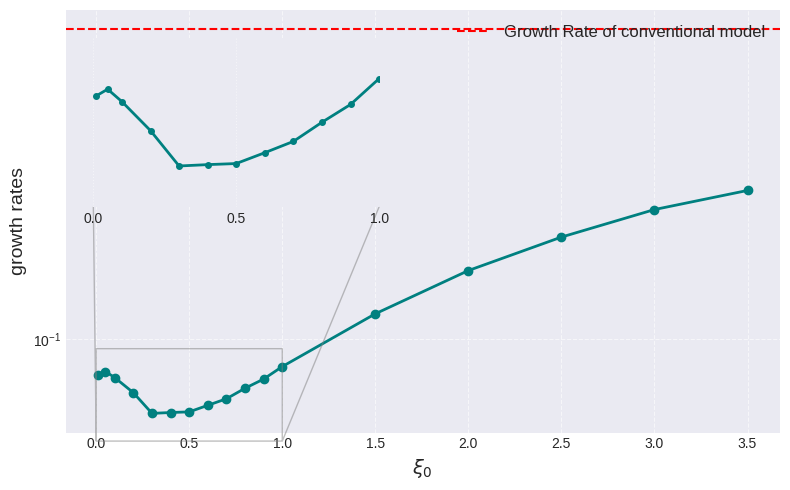

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data: (xi_0, B_max)
data = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]

# Split into x and y
xi_vals, bmax_vals = zip(*data)

# Main figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xi_vals, bmax_vals, 'o-', color='teal', linewidth=2, markersize=6)
ax.set_xlabel(r'$\xi_0$', fontsize=14)
ax.set_ylabel(r'growth rates', fontsize=14)
ax.set_yscale('log')
# ax.set_title('B_max vs. ξ₀', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6)
#put an h line at groth rate=0.7005608335279412
ax.axhline(y=0.7005608335279412, color='red', linestyle='--', label='Growth Rate of conventional model')
ax.legend(loc='upper right', fontsize=12)
# Inset (zoomed region)
axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
axins.plot(xi_vals, bmax_vals, 'o-', color='teal', linewidth=2, markersize=4)
axins.set_xlim(0, 1)
axins.set_ylim(min(bmax_vals[:12]) - 0.01, max(bmax_vals[:12]) + 0.01)
axins.set_xticks([0.0, 0.5, 1.0])
axins.set_yticks([])
axins.grid(True, linestyle=':', alpha=0.5)

# Optional: draw a box on the main plot around the zoomed region
ax.indicate_inset_zoom(axins, edgecolor="gray")

plt.tight_layout()
plt.savefig('bmax_vs_xi_inset.png', dpi=300)
plt.show()


/tmp/ipykernel_6255/921585553.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


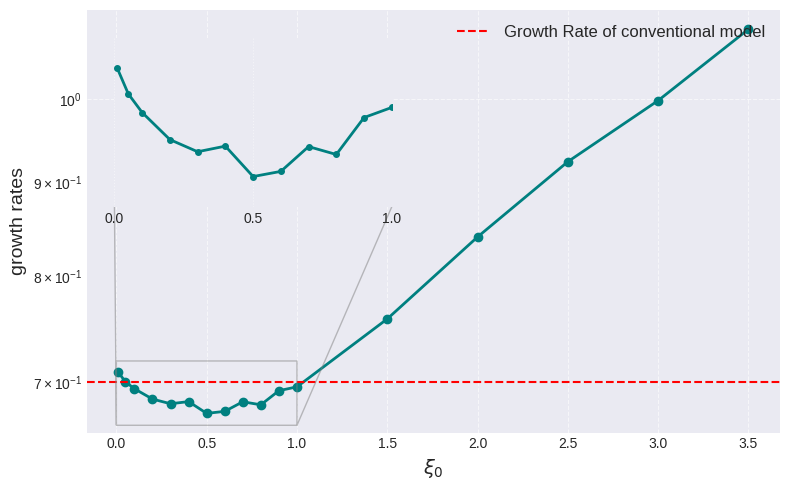

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Data: (xi_0, B_max)
data = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]

# Split into x and y
xi_vals, bmax_vals = zip(*data)

# Main figure
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(xi_vals, bmax_vals, 'o-', color='teal', linewidth=2, markersize=6)
ax.set_xlabel(r'$\xi_0$', fontsize=14)
ax.set_ylabel(r'growth rates', fontsize=14)
ax.set_yscale('log')
# ax.set_title('B_max vs. ξ₀', fontsize=16)
ax.grid(True, linestyle='--', alpha=0.6)
#put an h line at groth rate=0.7005608335279412
ax.axhline(y=0.7005608335279412, color='red', linestyle='--', label='Growth Rate of conventional model')
ax.legend(loc='upper right', fontsize=14)
# Inset (zoomed region)
axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
axins.plot(xi_vals, bmax_vals, 'o-', color='teal', linewidth=2, markersize=4)
axins.set_xlim(0, 1)
axins.set_ylim(min(bmax_vals[:12]) - 0.01, max(bmax_vals[:12]) + 0.01)
axins.set_xticks([0.0, 0.5, 1.0])
axins.set_yticks([])
axins.grid(True, linestyle=':', alpha=0.5)

# Optional: draw a box on the main plot around the zoomed region
ax.indicate_inset_zoom(axins, edgecolor="gray")

plt.tight_layout()
plt.savefig('bmax_vs_xi_inset.png', dpi=300)
plt.show()


/tmp/ipykernel_6255/39237081.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


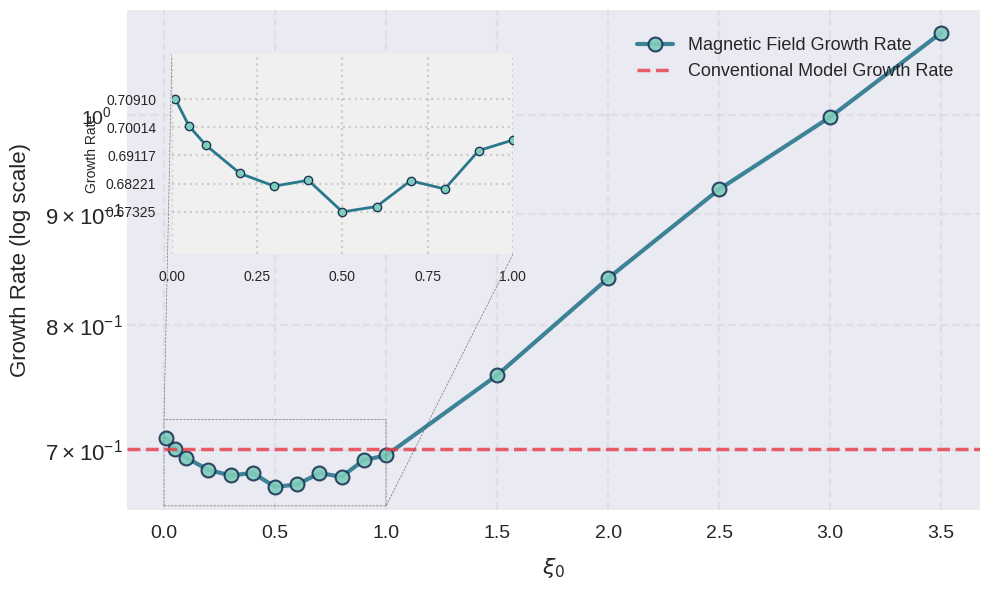

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np

# Data: (xi_0, B_max)
data = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]

# Split into x and y
xi_vals, bmax_vals = zip(*data)

# Create figure with modern style
plt.style.use('seaborn-v0_8-poster')
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Main plot with enhanced styling
main_line = ax.plot(xi_vals, bmax_vals, 'o-', 
                   color='#2a788e', 
                   linewidth=3, 
                   markersize=10,
                   markerfacecolor='#7fcdbb',
                   markeredgecolor='#1d3557',
                   markeredgewidth=1.5,
                   alpha=0.9,
                   label='Magnetic Field Growth Rate')

# Reference line with improved styling
ref_line = ax.axhline(y=0.7005608335279412, 
                     color='#e63946', 
                     linestyle='--', 
                     linewidth=2.5,
                     alpha=0.8,
                     label='Conventional Model Growth Rate')

# Axis labels with LaTeX and larger font
ax.set_xlabel(r'$\xi_0$', fontsize=16, labelpad=10)
ax.set_ylabel(r'Growth Rate (log scale)', fontsize=16, labelpad=10)
ax.set_yscale('log')

# Grid and tick customization
ax.grid(True, which='both', linestyle='--', alpha=0.6, color='#d9d9d9')
ax.tick_params(axis='both', which='major', labelsize=14)

# Legend with better positioning and styling
legend = ax.legend(loc='upper right', fontsize=13, framealpha=1, 
                  edgecolor='#333333', facecolor='white',
                  borderpad=1, handlelength=2)

# Inset plot with enhanced styling
axins = inset_axes(ax, width="40%", height="40%", loc='upper left', borderpad=2)
axins.plot(xi_vals, bmax_vals, 'o-', 
          color='#2a788e', 
          linewidth=2, 
          markersize=6,
          markerfacecolor='#7fcdbb',
          markeredgecolor='#1d3557',
          markeredgewidth=1)

# Inset customization - focusing on the interesting low-xi region
axins.set_xlim(0, 1)
axins.set_ylim(min(bmax_vals[:12])*0.98, max(bmax_vals[:12])*1.02)  # Tighter y-range
axins.set_xticks(np.linspace(0, 1, 5))
axins.set_yticks(np.linspace(min(bmax_vals[:12]), max(bmax_vals[:12]), 5))
axins.tick_params(labelsize=10)
axins.grid(True, linestyle=':', alpha=0.4, color='#999999')
axins.set_facecolor('#f0f0f0')

# Add y-axis label to inset
axins.set_ylabel('Growth Rate', fontsize=17, labelpad=5)

# Zoom indicator with subtle styling
ax.indicate_inset_zoom(axins, edgecolor="#555555", alpha=0.8, linestyle="--")

# Adjust layout and save
plt.tight_layout()
plt.savefig('growth_rate_vs_xi_inset_enhanced.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()


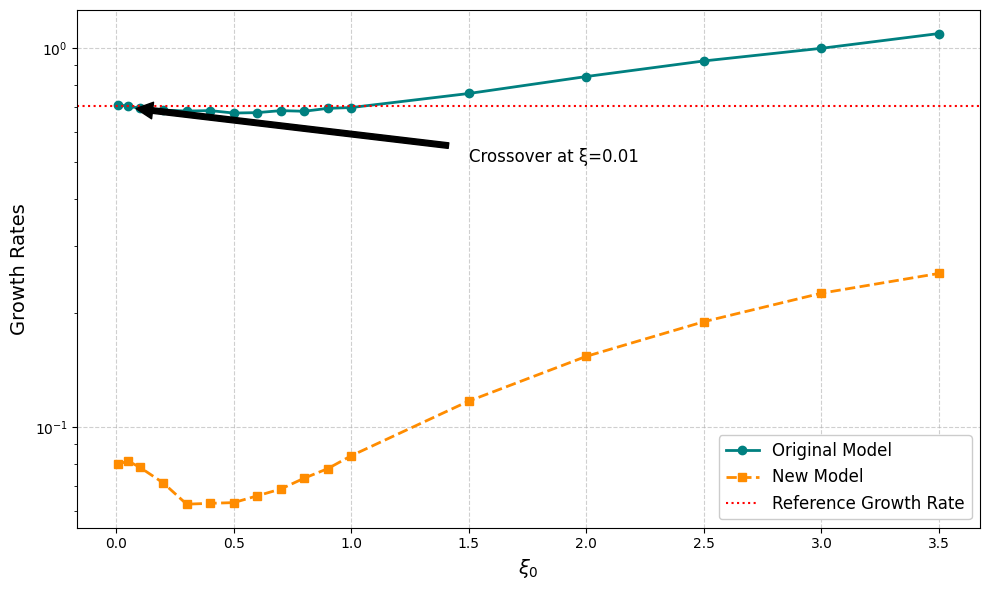

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# Original dataset
data1 = [
    (0.01, 0.709098578545399),
    (0.05, 0.700560833527941),
    (0.1,  0.694404653534126),
    (0.2,  0.685453438250599),
    (0.3,  0.681441139835652),
    (0.4,  0.683297807574413),
    (0.5,  0.673245742890559),
    (0.6,  0.674950031159325),
    (0.7,  0.683141675804847),
    (0.8,  0.68053324941304),
    (0.9,  0.692735404768463),
    (1.0,  0.696080554275116),
    (1.5,  0.758166435371509),
    (2.0,  0.840463554853003),
    (2.5,  0.92388371442431),
    (3.0,  0.997718068076932),
    (3.5,  1.09131746088493),
]

# New dataset (using same xi values)
data2 = [
    (0.01, 0.0797087354576899),
    (0.05, 0.0813575911693746),
    (0.1,  0.078309718559072),
    (0.2,  0.0712071382856784),
    (0.3,  0.0625451132836764),
    (0.4,  0.0628790798548453),
    (0.5,  0.063142809412421),
    (0.6,  0.0658012805855093),
    (0.7,  0.0685659798326533),
    (0.8,  0.0732555983690421),
    (0.9,  0.0776132018306003),
    (1.0,  0.0839500498197687),
    (1.5,  0.117013537234697),
    (2.0,  0.153569615490329),
    (2.5,  0.189549199539637),
    (3.0,  0.225364125496884),
    (3.5,  0.25412795562514)
]

# Split into x and y
xi1, y1 = zip(*data1)
xi2, y2 = zip(*data2)

# Create figure
plt.figure(figsize=(10, 6))

# Plot both datasets
plt.plot(xi1, y1, 'o-', color='teal', linewidth=2, markersize=6, label='Original Model')
plt.plot(xi2, y2, 's--', color='darkorange', linewidth=2, markersize=6, label='New Model')

# Reference line and styling
plt.axhline(y=0.7005608335279412, color='red', linestyle=':', label='Reference Growth Rate')
plt.xlabel(r'$\xi_0$', fontsize=14)
plt.ylabel('Growth Rates', fontsize=14)
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12, framealpha=1)

# Add text annotation for the crossover point
crossover = np.interp(0.7005608335279412, y2[::-1], xi2[::-1])  # Find where new model crosses reference
plt.annotate(f'Crossover at ξ={crossover:.2f}', xy=(crossover, 0.7005608335279412),xytext=(1.5, 0.5),arrowprops=dict(facecolor='black', shrink=0.05),fontsize=12)

plt.tight_layout()
plt.savefig('combined_growth_rates.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
import numpy as np
import re

def calculate_average_bstrength(trial_range, filepath='/home/gayathri/MSc_thesis/Phase2/new/data_files/good_data.txt'):
    """
    Calculate average of last 10 B_strength values for given trial range
    
    Args:
        trial_range (str): Range in format 'start-end' (e.g., '20-25')
        filepath (str): Path to data file
    
    Returns:
        dict: Averages for each trial in the range
    """
    # Parse trial range
    start, end = map(int, trial_range.split('-'))
    trial_numbers = range(start, end + 1)
    
    results = {}
    
    try:
        with open(filepath, 'r') as f:
            lines = f.readlines()
            
            for trial in trial_numbers:
                # Find all data blocks for this trial
                pattern = re.compile(rf"# B_strength\[:, {trial}\]")
                matches = [i for i, line in enumerate(lines) if pattern.search(line)]
                
                if not matches:
                    print(f"Warning: Trial {trial} not found in file")
                    continue
                
                # Get the last block for this trial (in case of multiple entries)
                last_block_start = matches[-1]
                
                # Find where the data ends (next header or EOF)
                data_end = len(lines)
                for i in range(last_block_start + 1, len(lines)):
                    if lines[i].startswith('# B_strength'):
                        data_end = i
                        break
                
                # Extract last 10 values
                data_lines = lines[last_block_start + 1 : data_end]
                values = [float(line.strip()) for line in data_lines[-10:]]
                
                if len(values) < 10:
                    print(f"Warning: Trial {trial} has only {len(values)} values")
                
                avg = np.mean(values)
                results[trial] = avg
                
    except FileNotFoundError:
        print(f"Error: File not found at {filepath}")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None
    
    return results

# Example usage
if __name__ == "__main__":
    trial_range = input("Enter trial range (e.g., '20-25'): ")
    results = calculate_average_bstrength(trial_range)
    
    if results:
        print("\nAverage of last 10 B_strength values:")
        for trial, avg in results.items():
            print(f"Trial {trial}: {avg:.6e}")
        
        # Calculate overall average
        overall_avg = np.mean(list(results.values()))
        print(f"\nOverall average: {overall_avg:.6e}")


Error: File not found at /home/gayathri/MSc_thesis/Phase2/new/data_files/good_data.txt
